<a href="https://www.kaggle.com/code/saugatkafley/pss3e18-sweetviz-skewness-removal-catboost?scriptVersionId=135038042" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from matplotlib import pyplot as plt 
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew, boxcox
!pip install sweetviz

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 58.0 MB/s eta 0:00:0000:0100:01
/kaggle/input/playground-series-s3e18/sample_submission.csv
/kaggle/input/playground-series-s3e18/train.csv
/kaggle/input/playground-series-s3e18/test.csv


# Dataset

In [2]:
sumbission = pd.read_csv("/kaggle/input/playground-series-s3e18/sample_submission.csv")
train = pd.read_csv("/kaggle/input/playground-series-s3e18/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e18/test.csv")

In [3]:
train.head()

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14838 non-null  int64  
 1   BertzCT            14838 non-null  float64
 2   Chi1               14838 non-null  float64
 3   Chi1n              14838 non-null  float64
 4   Chi1v              14838 non-null  float64
 5   Chi2n              14838 non-null  float64
 6   Chi2v              14838 non-null  float64
 7   Chi3v              14838 non-null  float64
 8   Chi4n              14838 non-null  float64
 9   EState_VSA1        14838 non-null  float64
 10  EState_VSA2        14838 non-null  float64
 11  ExactMolWt         14838 non-null  float64
 12  FpDensityMorgan1   14838 non-null  float64
 13  FpDensityMorgan2   14838 non-null  float64
 14  FpDensityMorgan3   14838 non-null  float64
 15  HallKierAlpha      14838 non-null  float64
 16  HeavyAtomMolWt     148

In [5]:
train.isna().sum()

id                   0
BertzCT              0
Chi1                 0
Chi1n                0
Chi1v                0
Chi2n                0
Chi2v                0
Chi3v                0
Chi4n                0
EState_VSA1          0
EState_VSA2          0
ExactMolWt           0
FpDensityMorgan1     0
FpDensityMorgan2     0
FpDensityMorgan3     0
HallKierAlpha        0
HeavyAtomMolWt       0
Kappa3               0
MaxAbsEStateIndex    0
MinEStateIndex       0
NumHeteroatoms       0
PEOE_VSA10           0
PEOE_VSA14           0
PEOE_VSA6            0
PEOE_VSA7            0
PEOE_VSA8            0
SMR_VSA10            0
SMR_VSA5             0
SlogP_VSA3           0
VSA_EState9          0
fr_COO               0
fr_COO2              0
EC1                  0
EC2                  0
EC3                  0
EC4                  0
EC5                  0
EC6                  0
dtype: int64

In [6]:
import sweetviz as sv

my_report = sv.analyze(train)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

/opt/conda/lib/python3.10/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/opt/conda/lib/python3.10/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/opt/conda/lib/python3.10/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/opt/conda/lib/python3.10/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/opt/conda/lib/python3.10/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/opt/conda/lib/python3.10/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



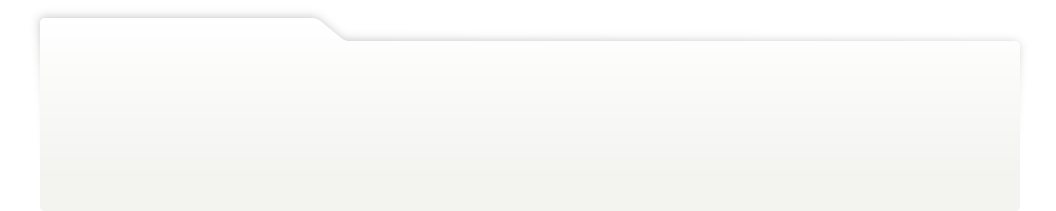
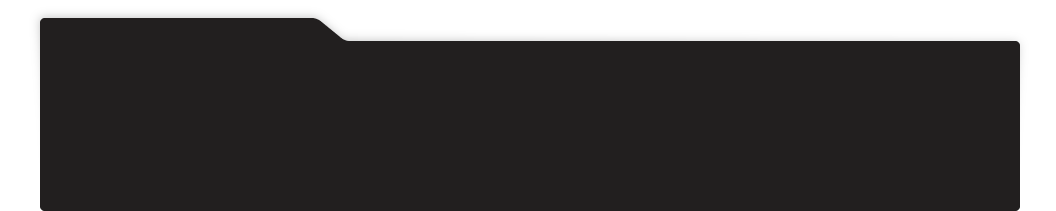
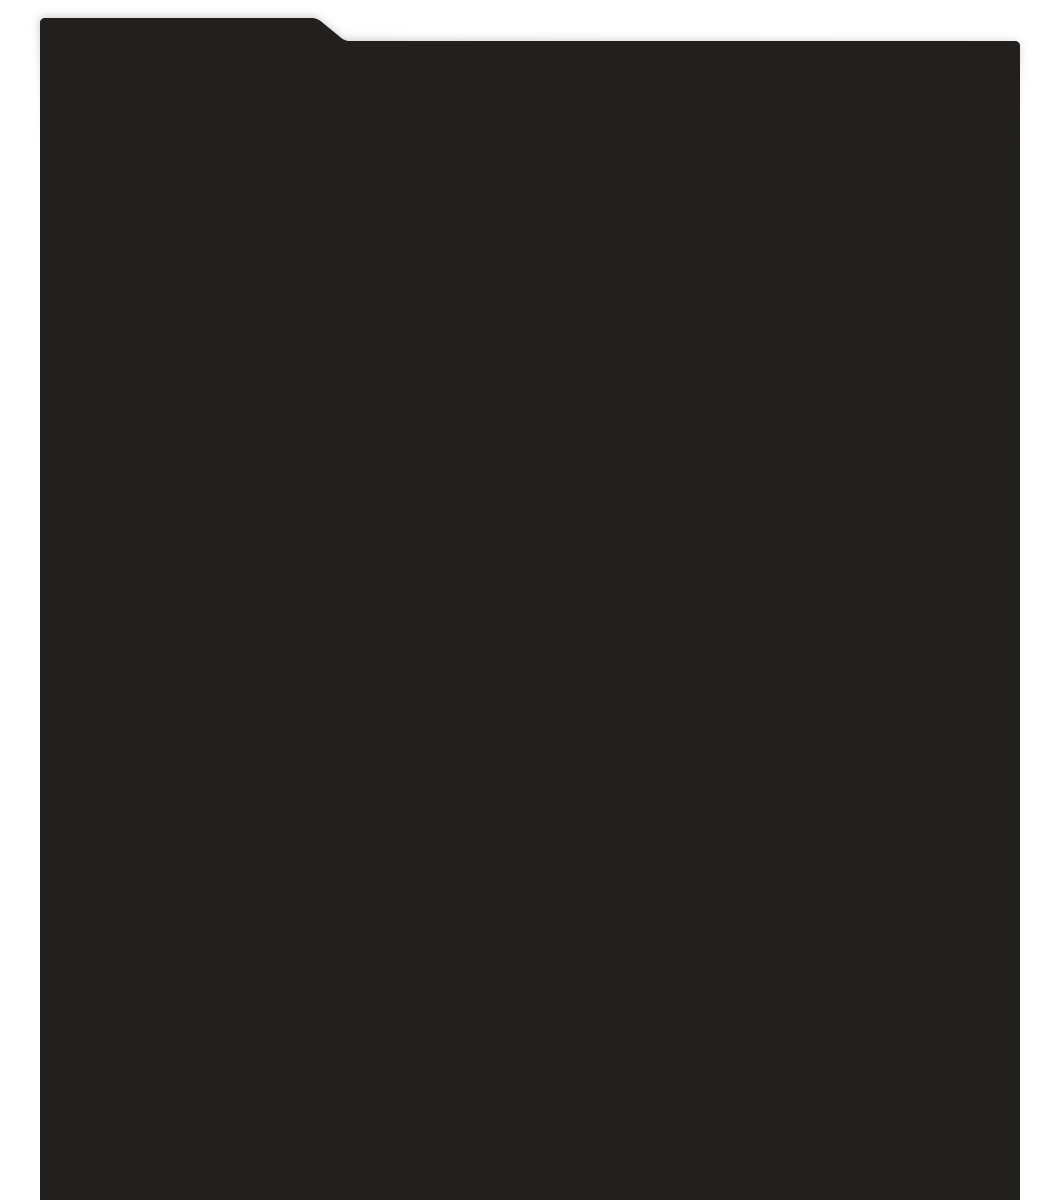
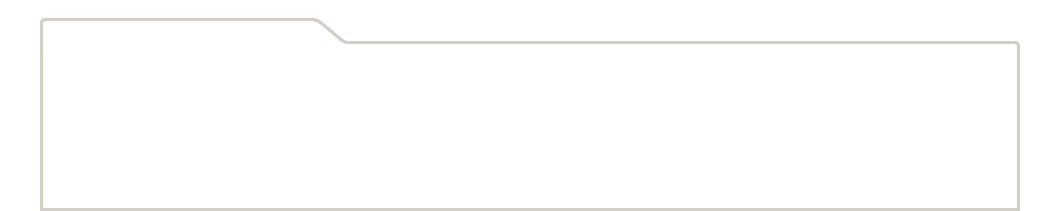
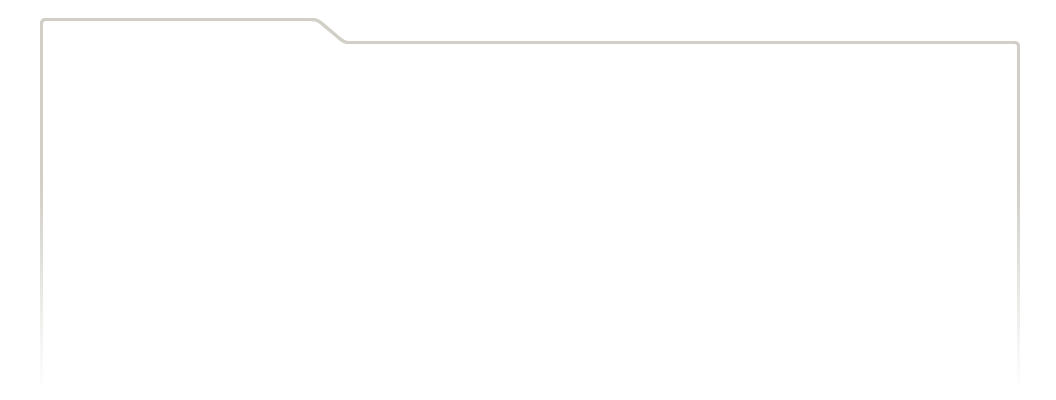
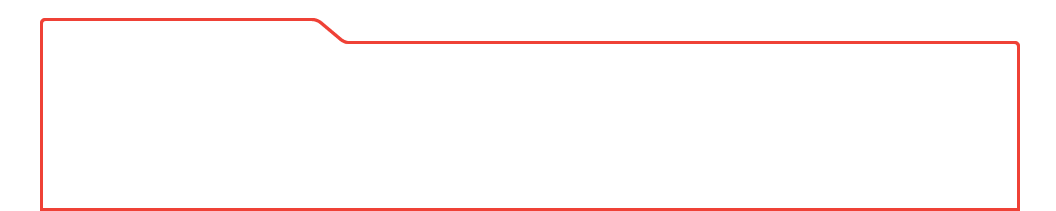
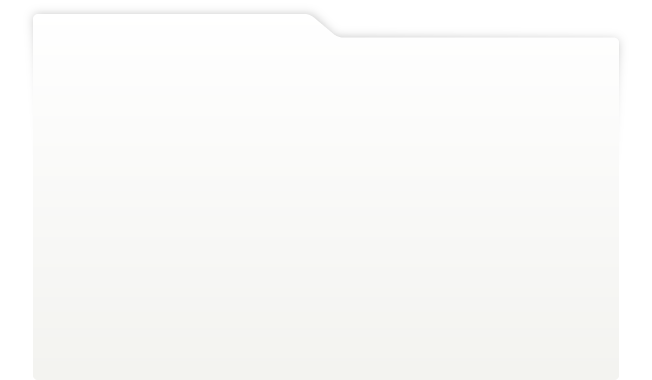
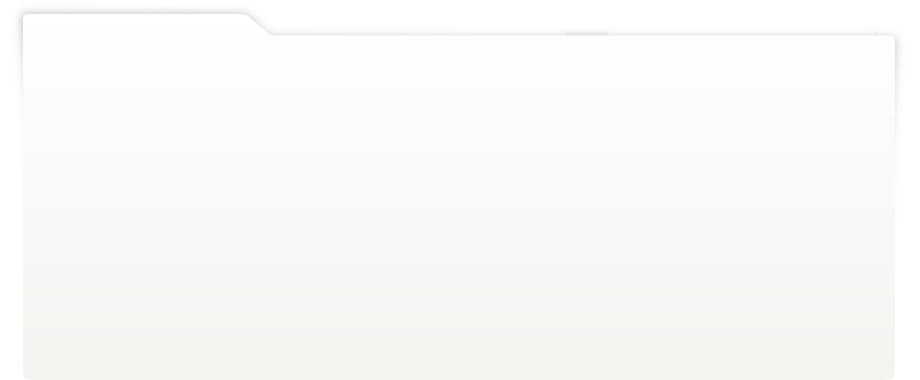
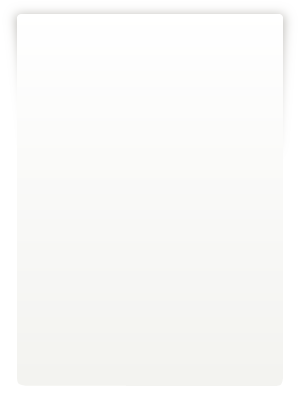
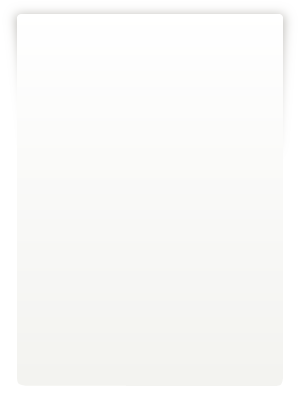
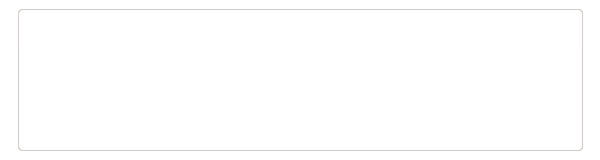
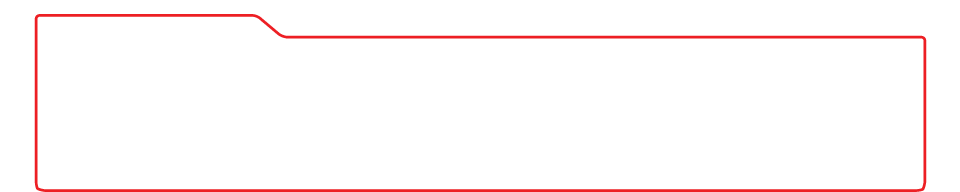
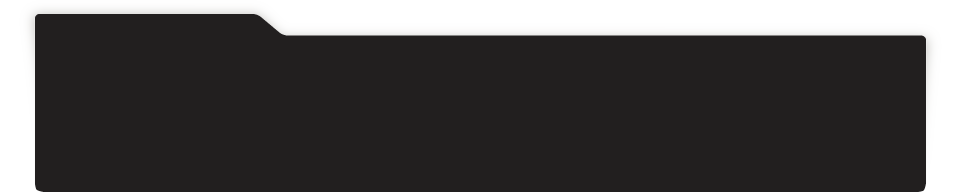
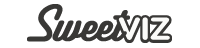
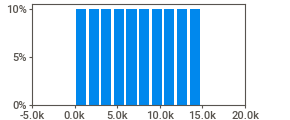
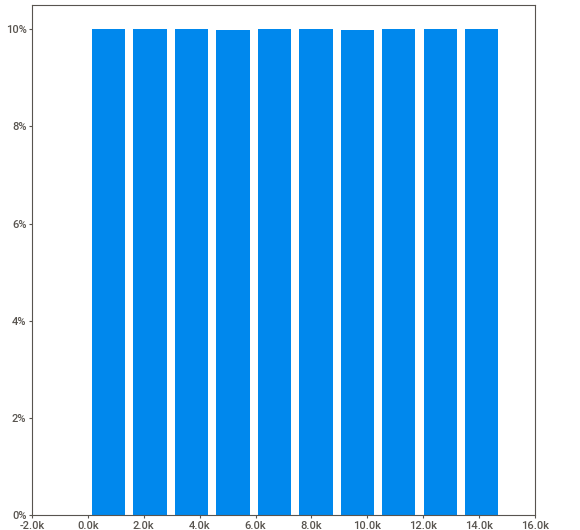
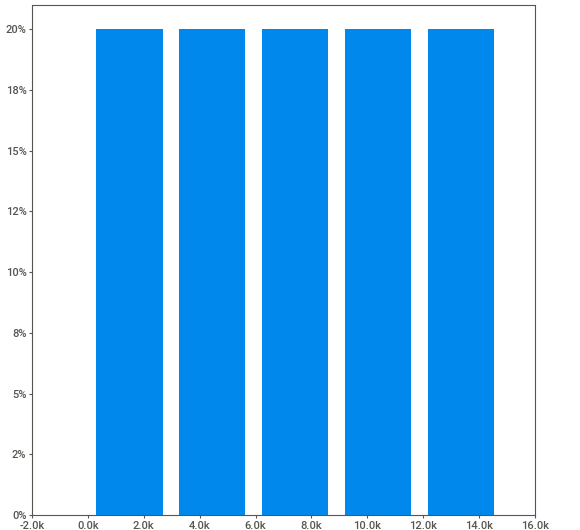
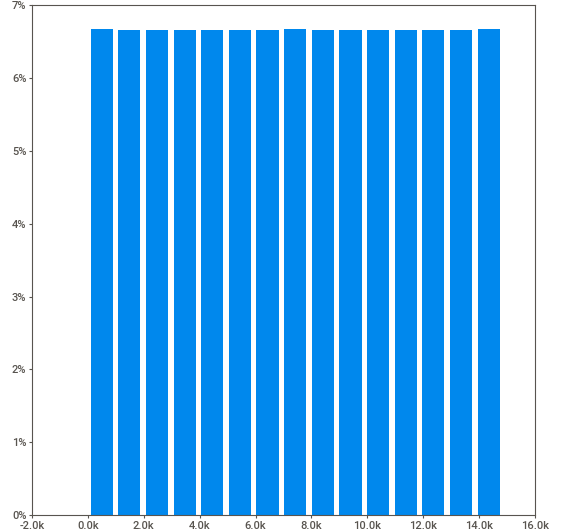
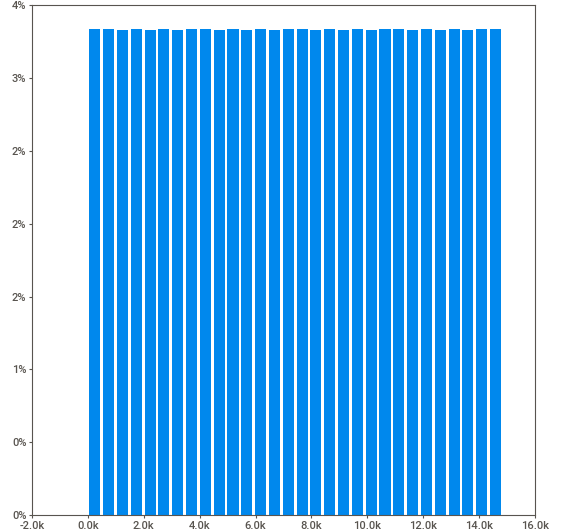
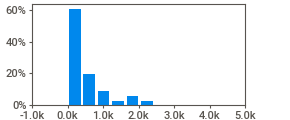
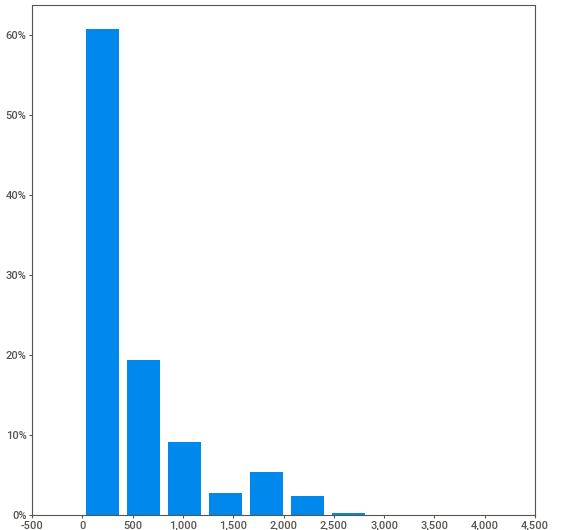
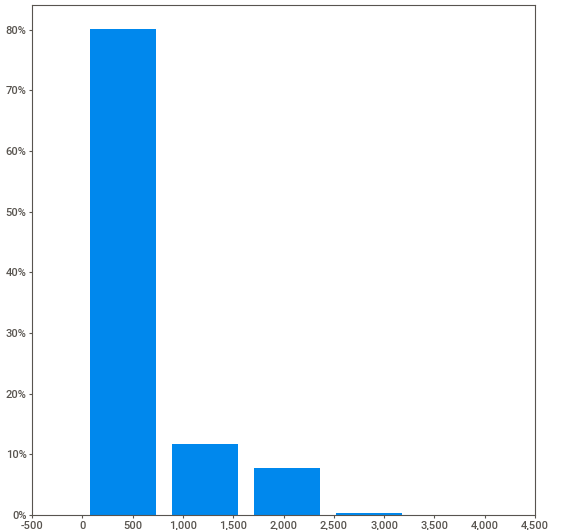
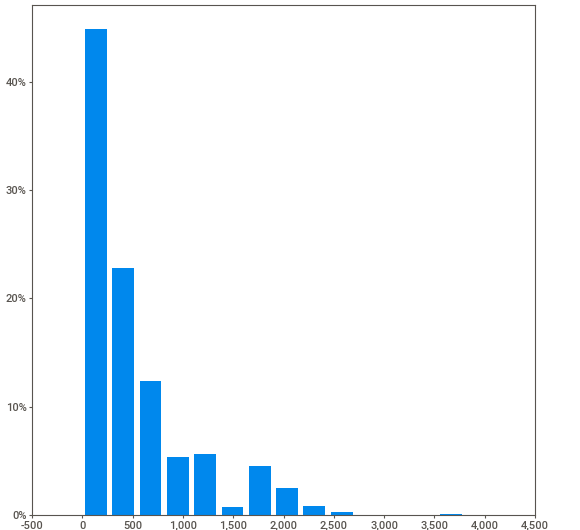
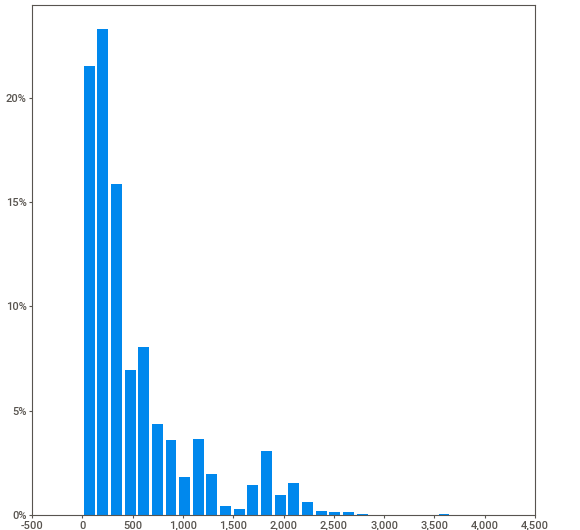
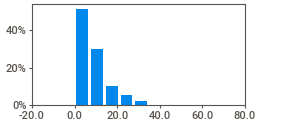
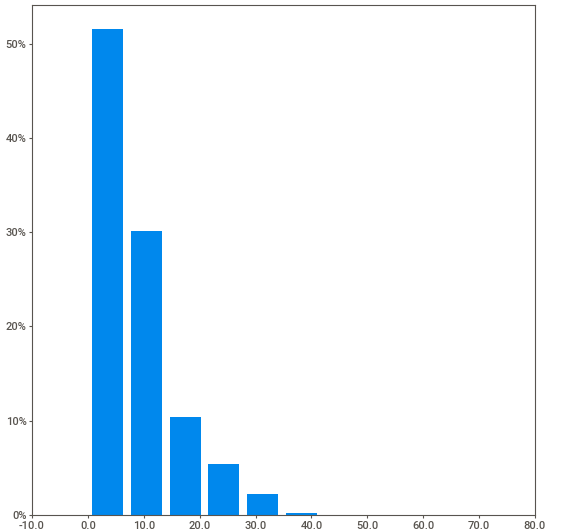
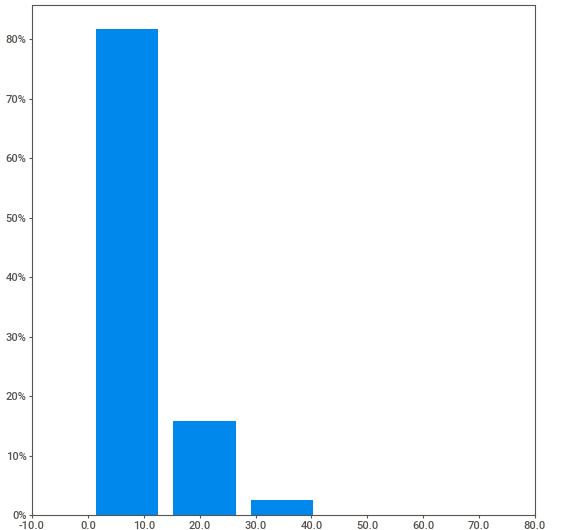
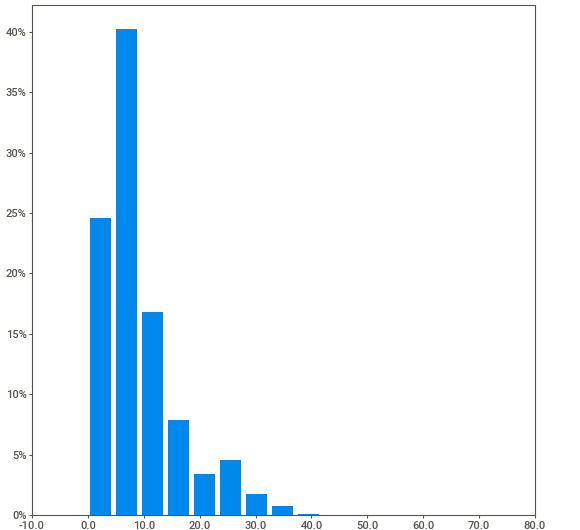
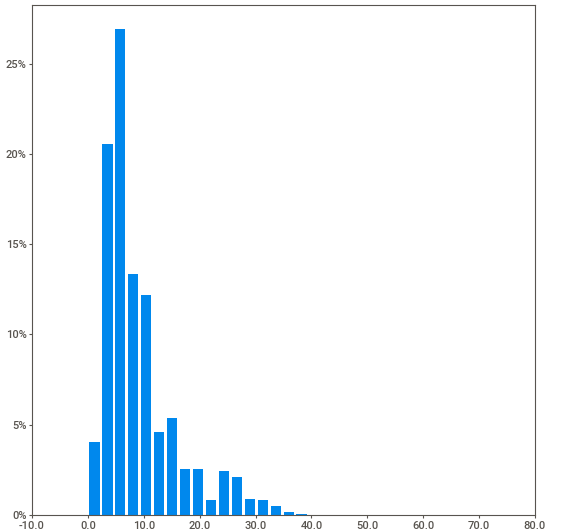
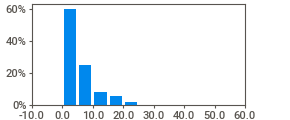
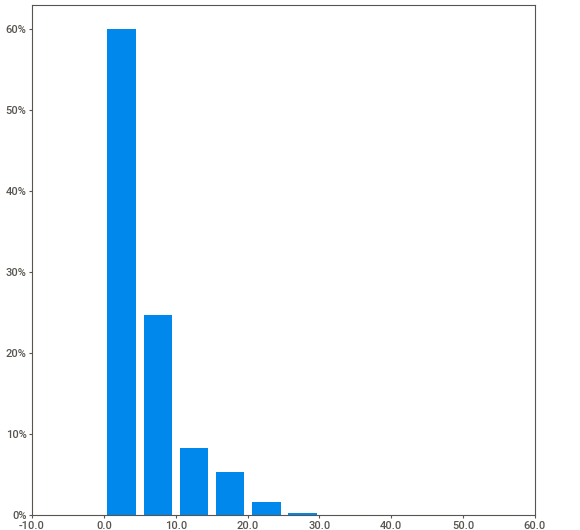
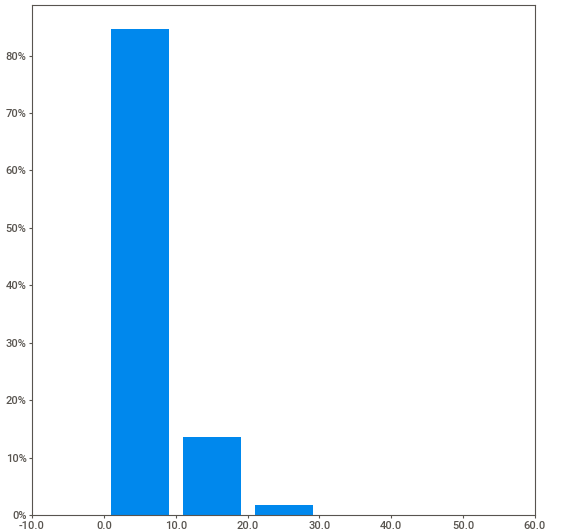
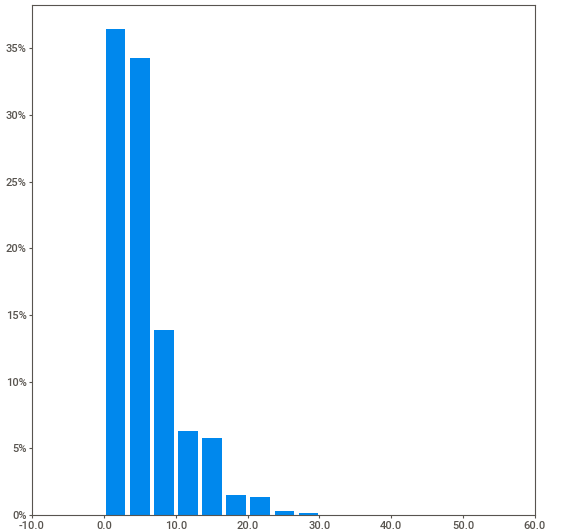
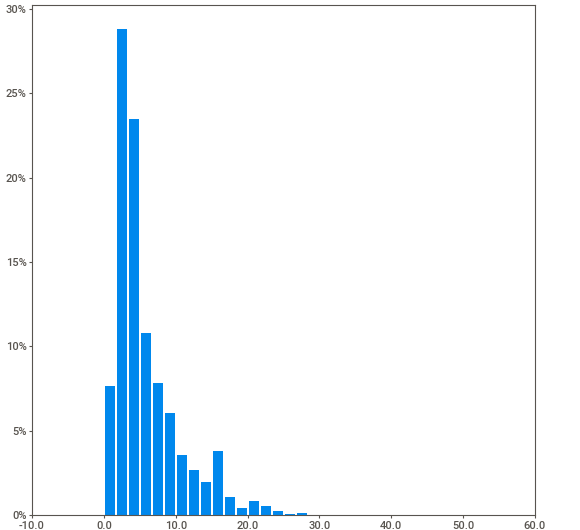
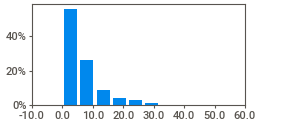
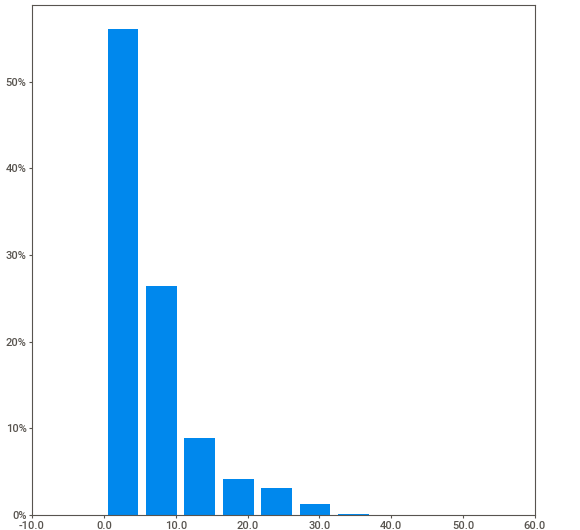
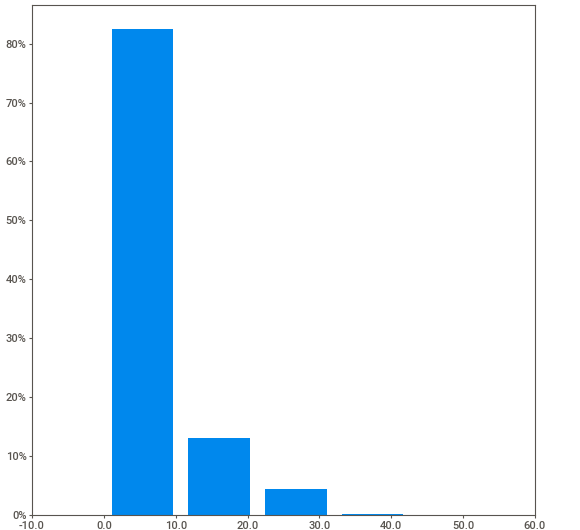
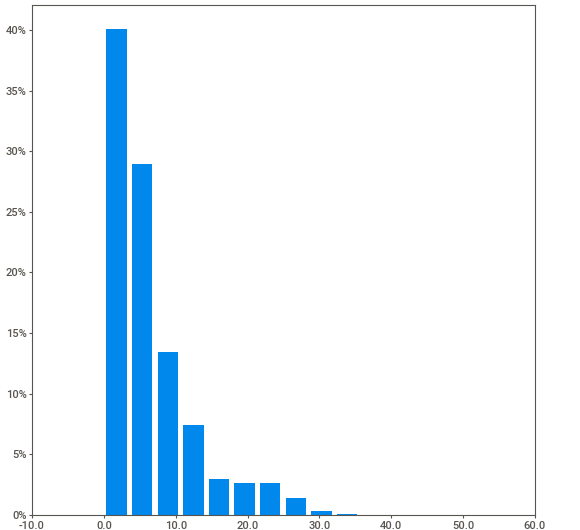
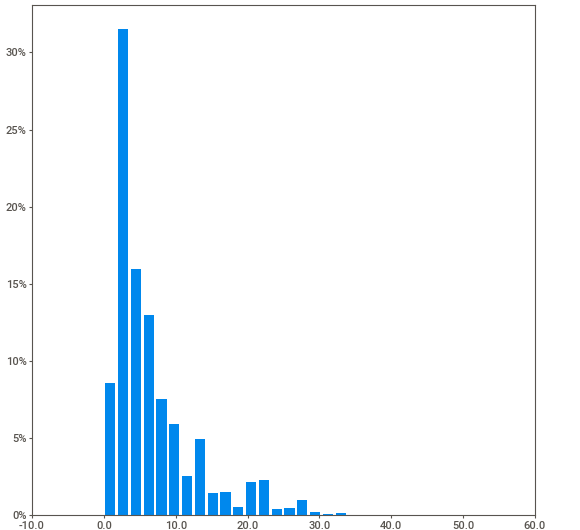
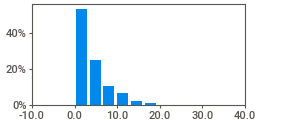
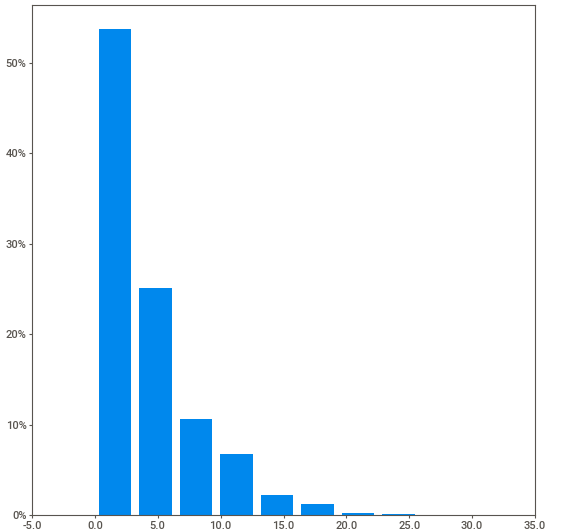
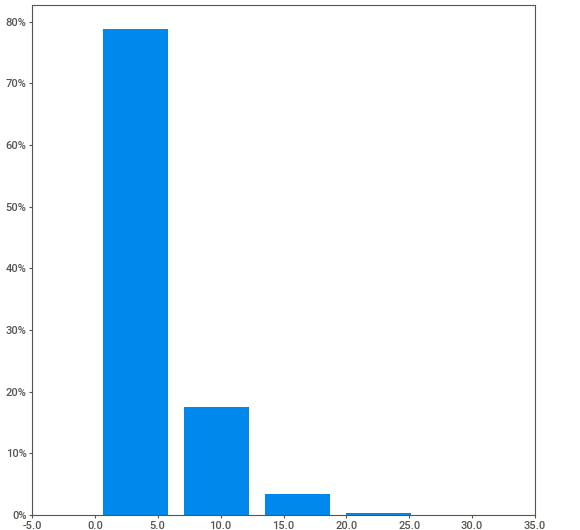
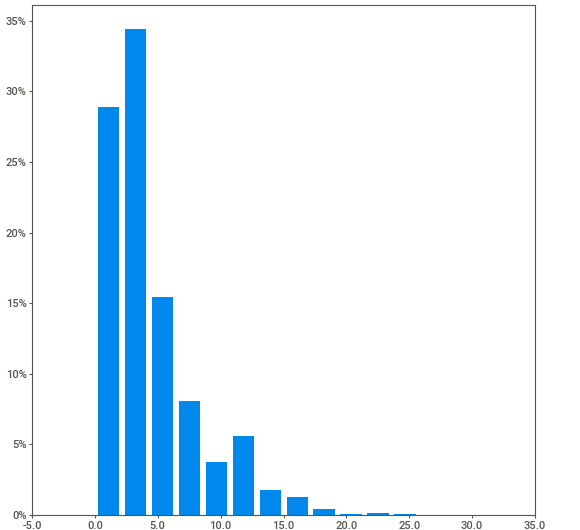
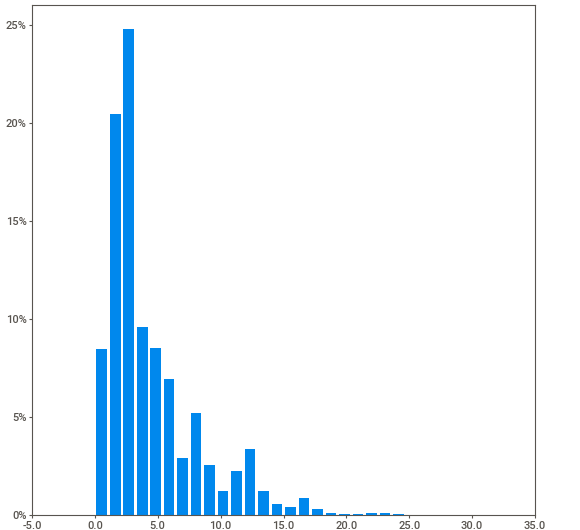
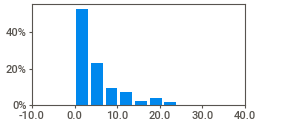
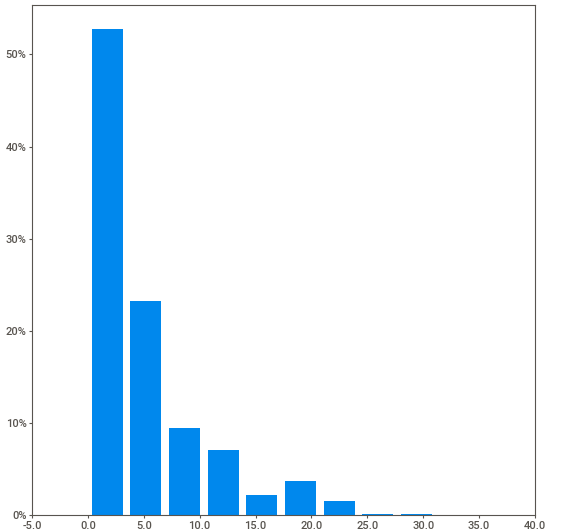
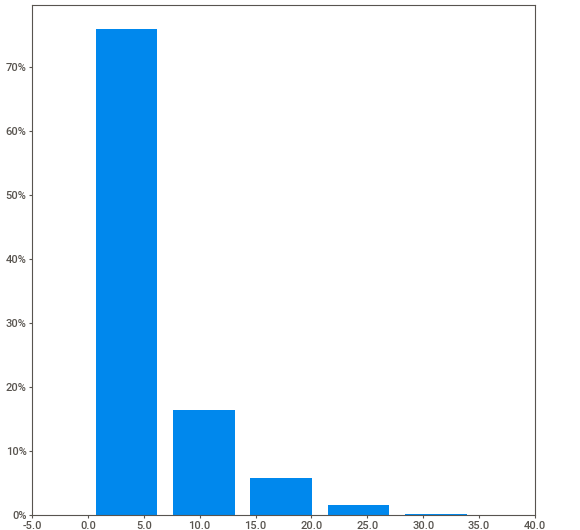
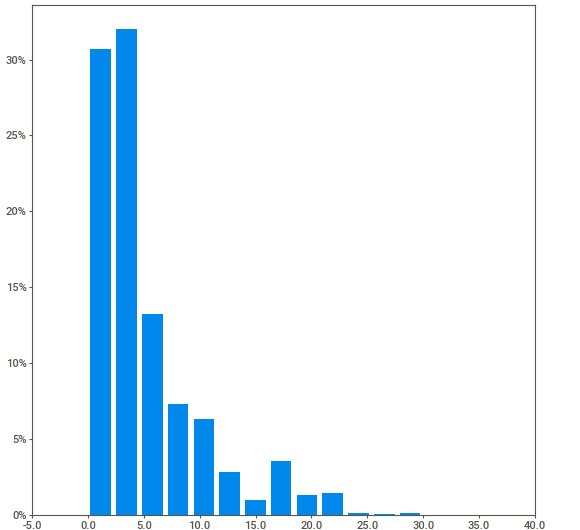
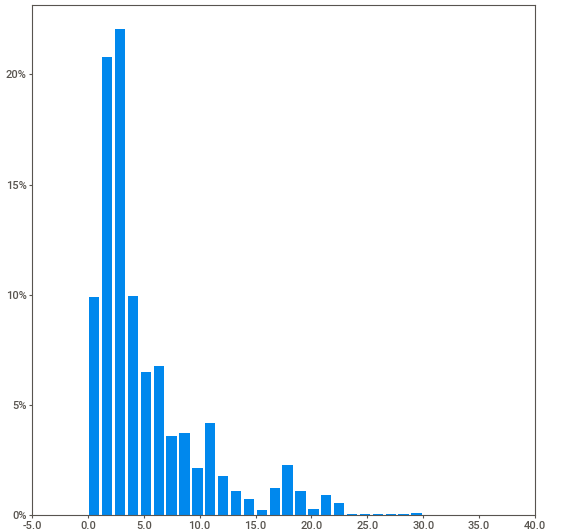
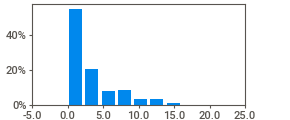
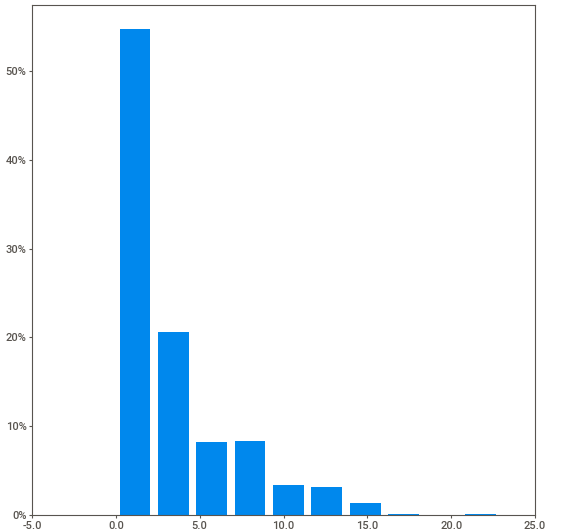
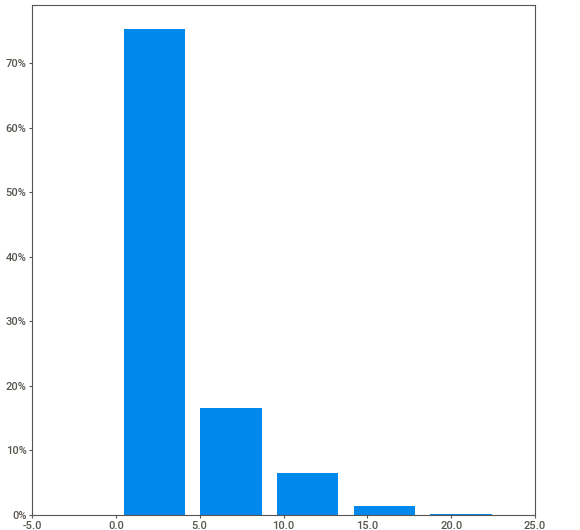
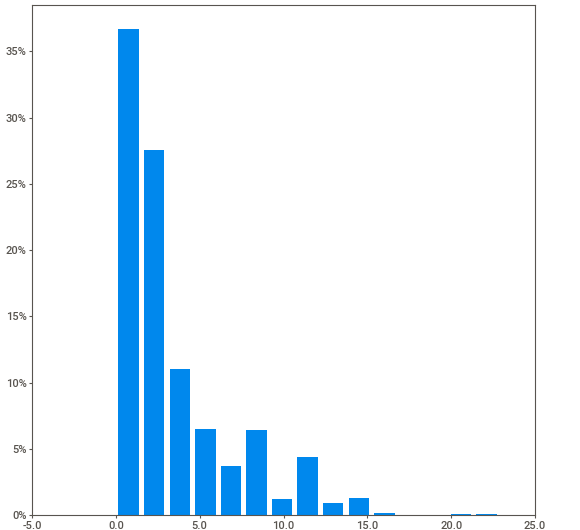
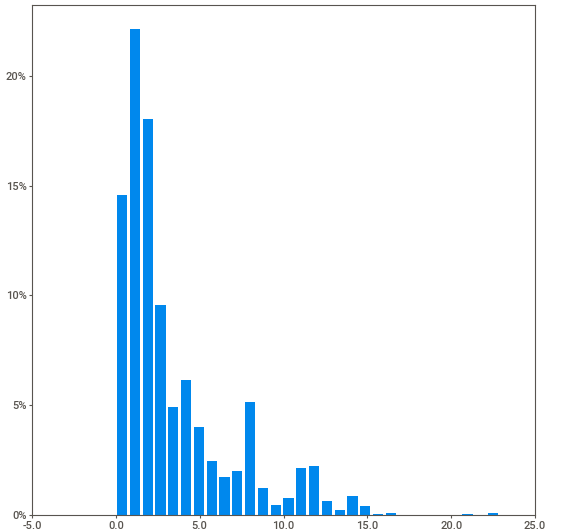
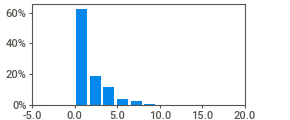
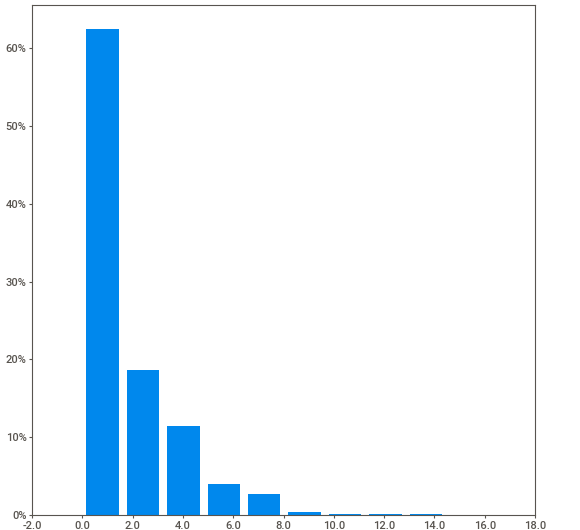
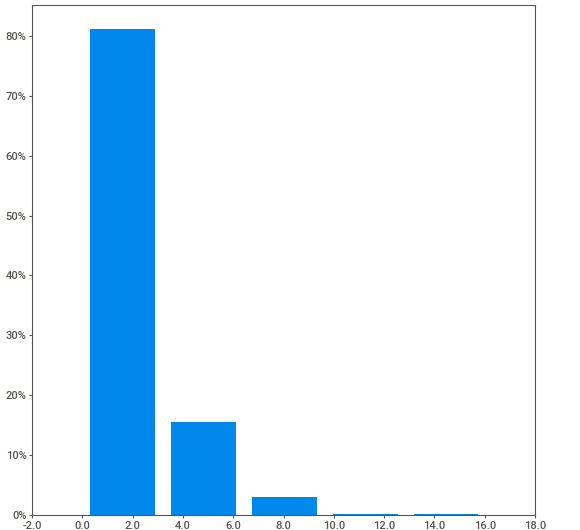
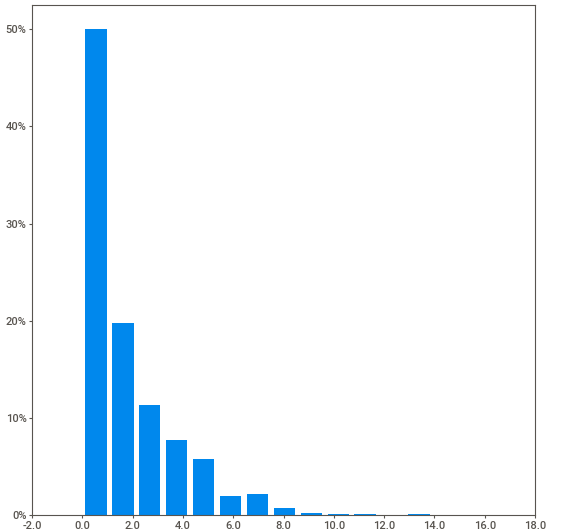
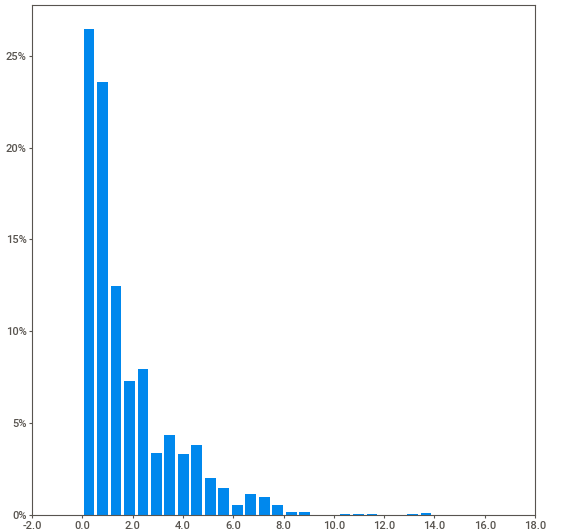
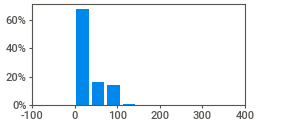
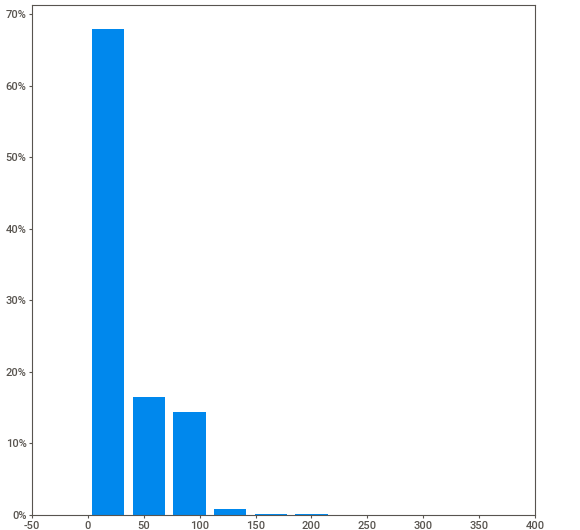
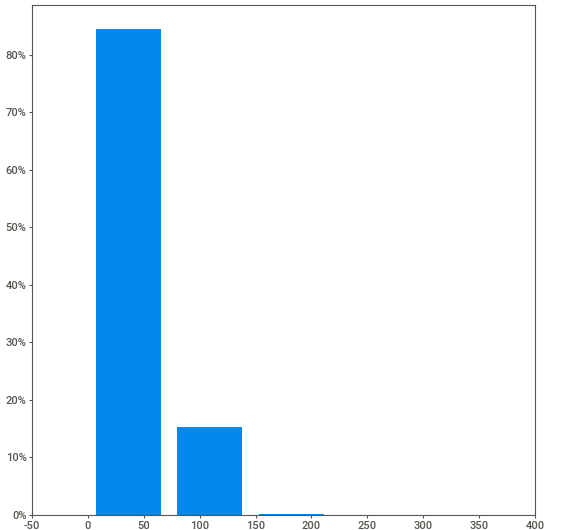
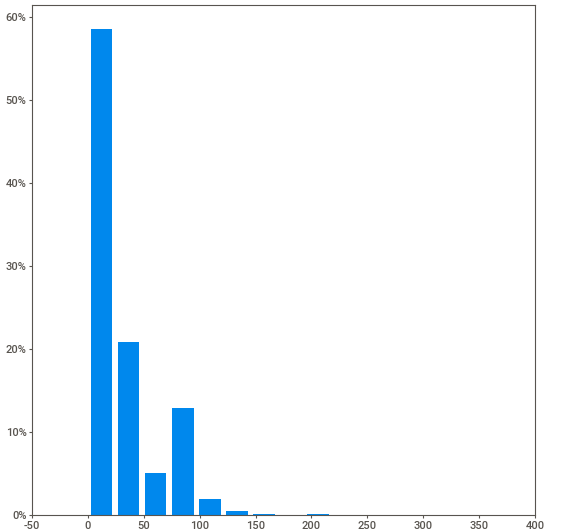
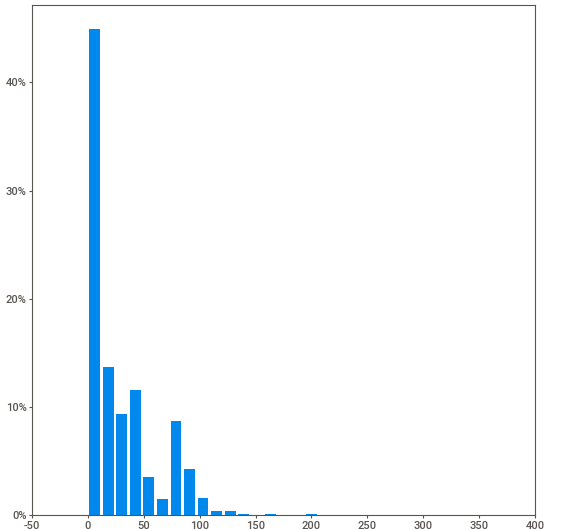
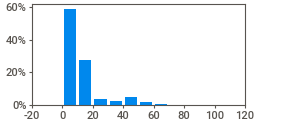
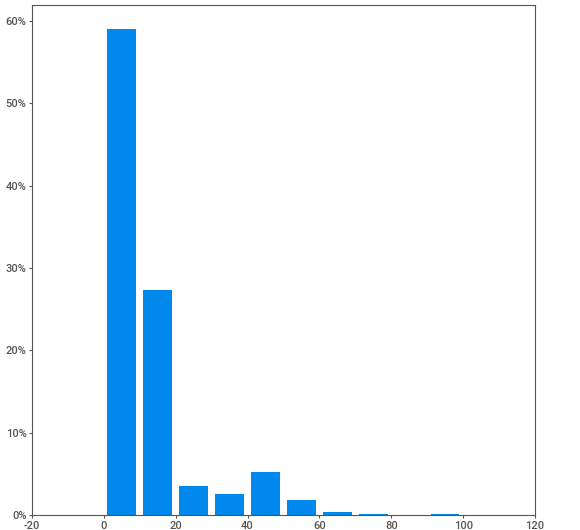
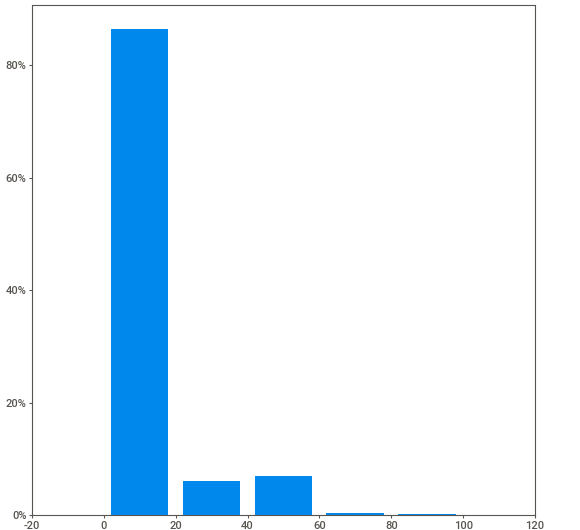
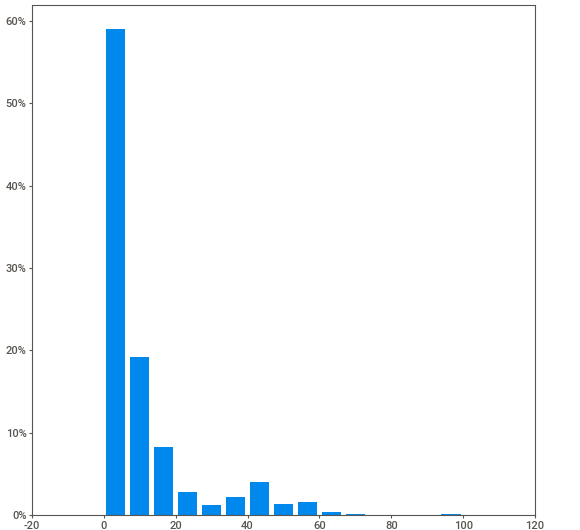
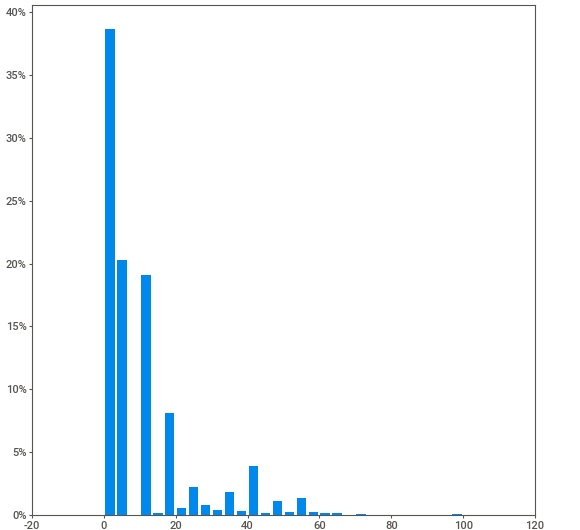
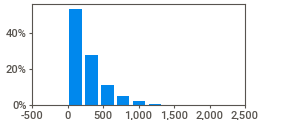
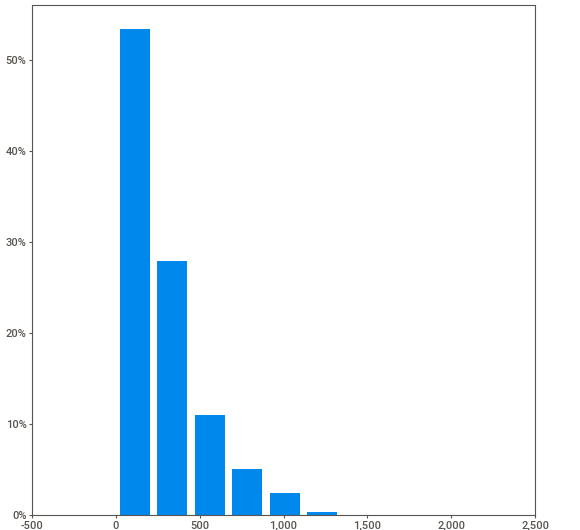
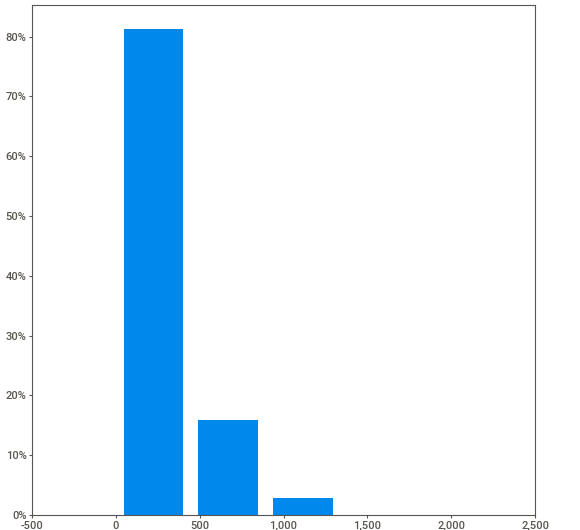
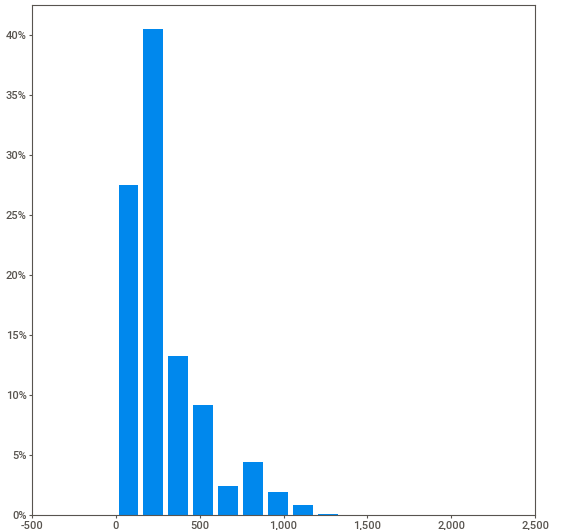
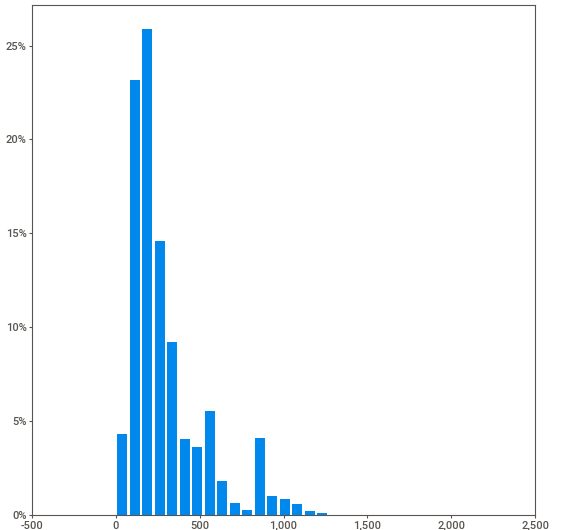
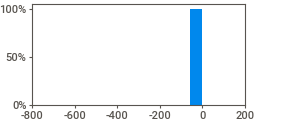
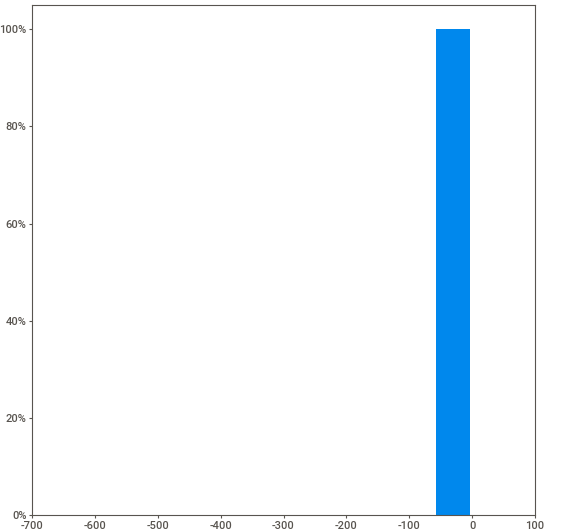
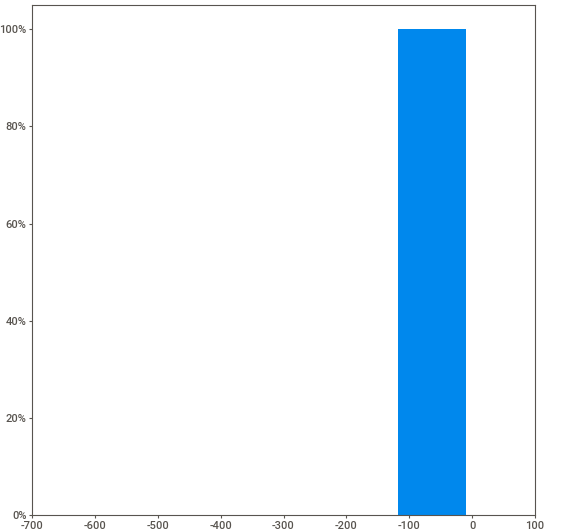
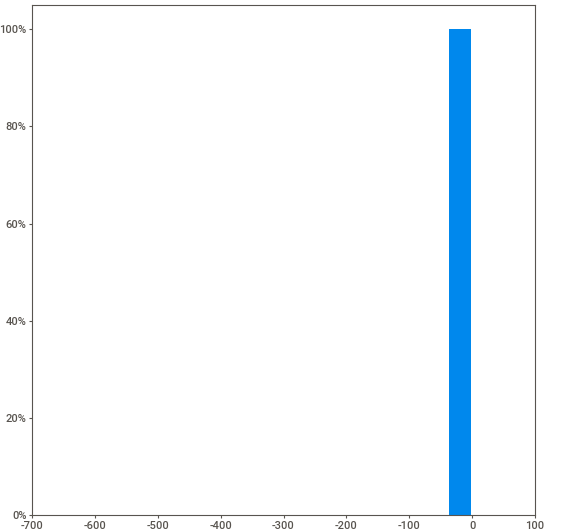
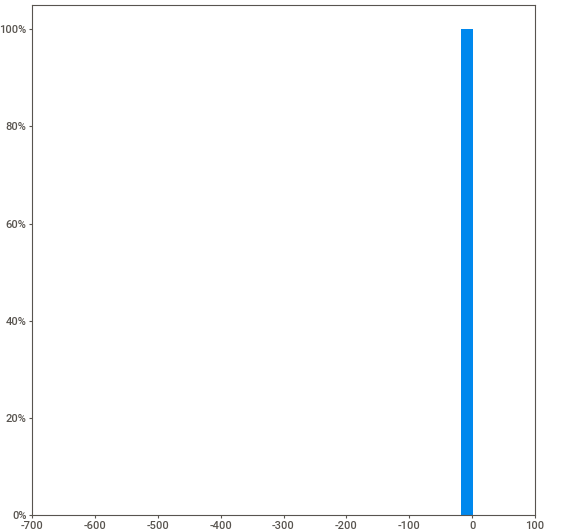
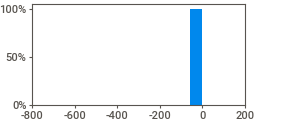
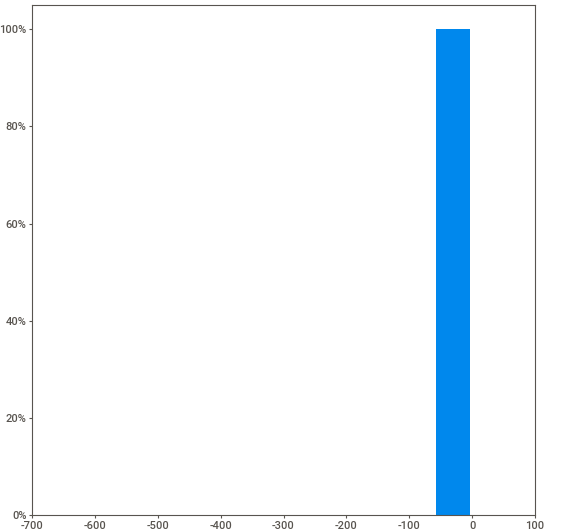
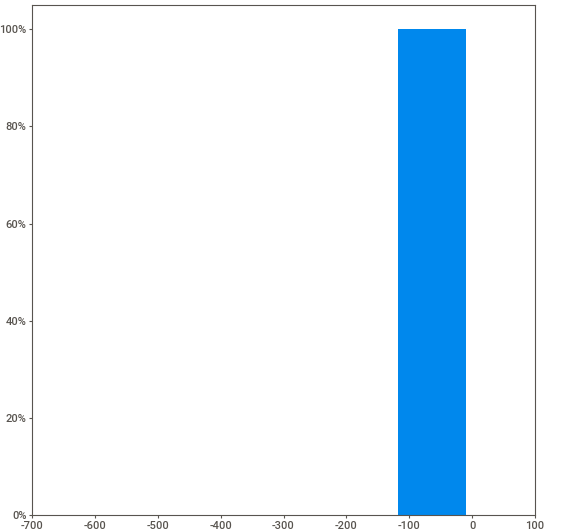
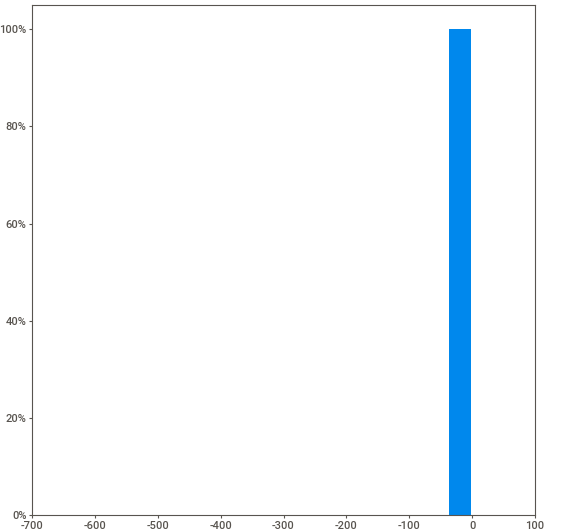
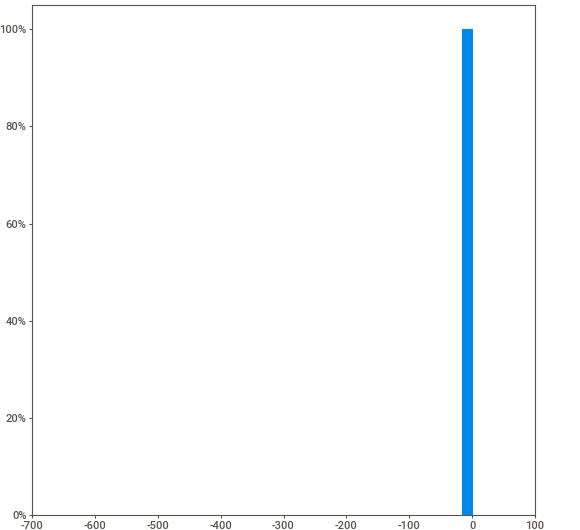
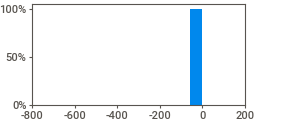
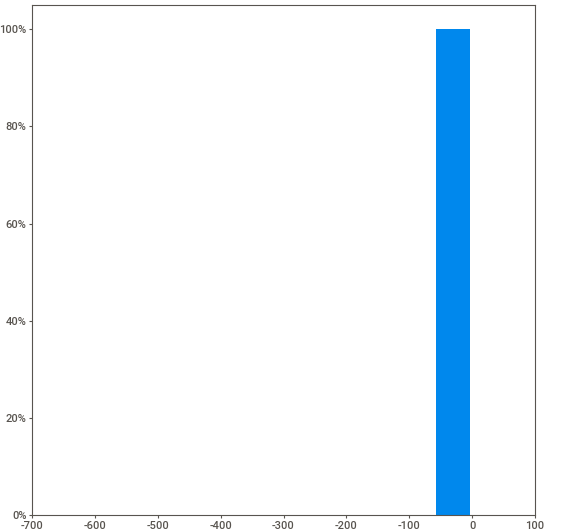
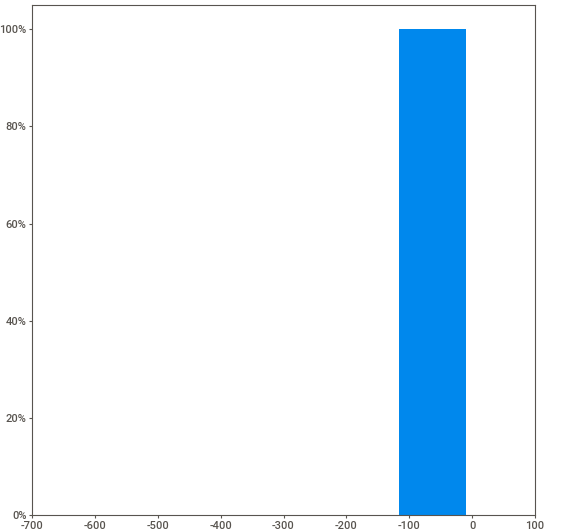
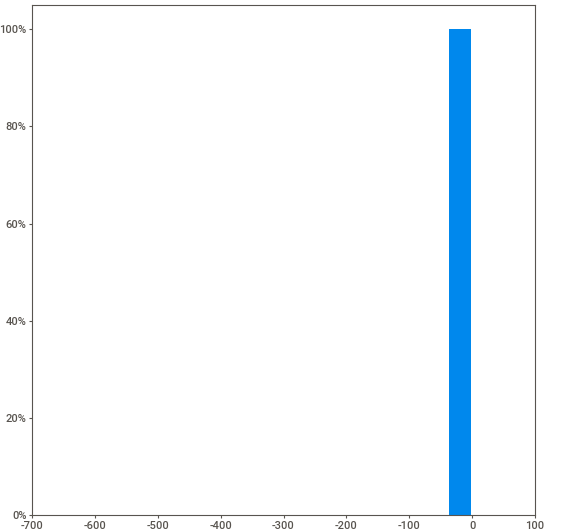
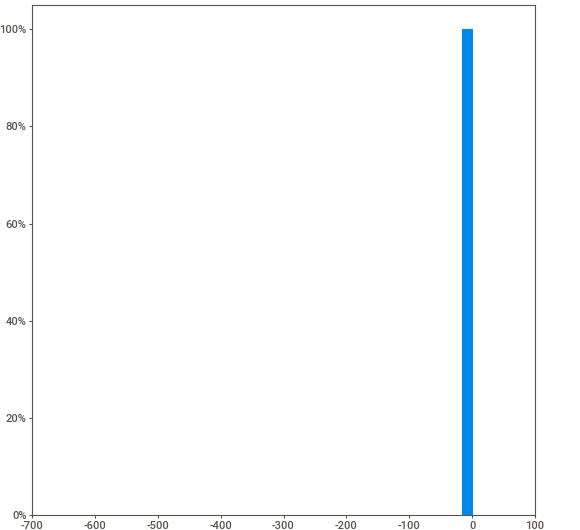
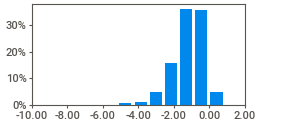
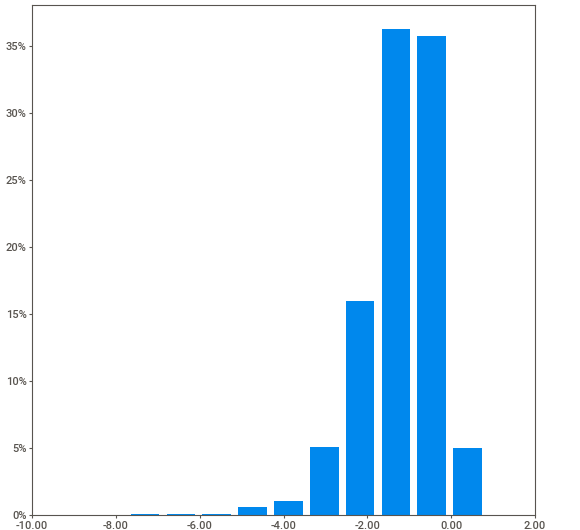
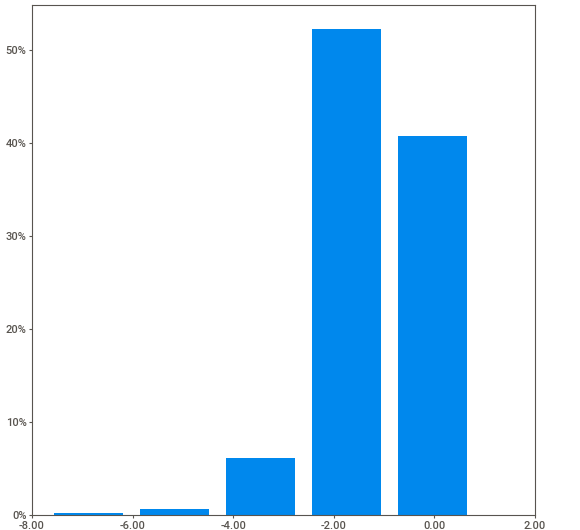
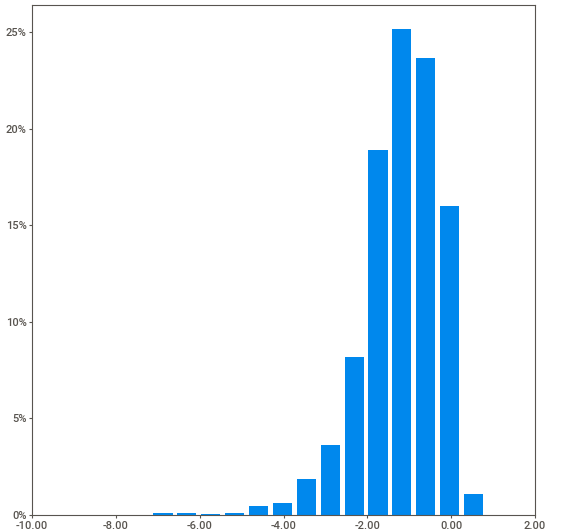
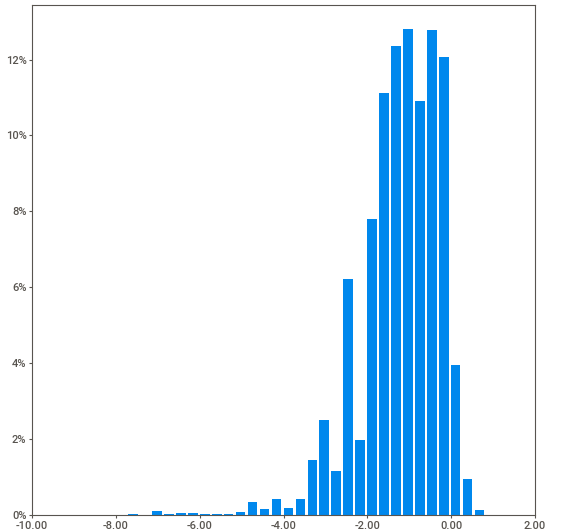
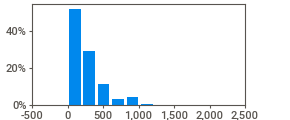
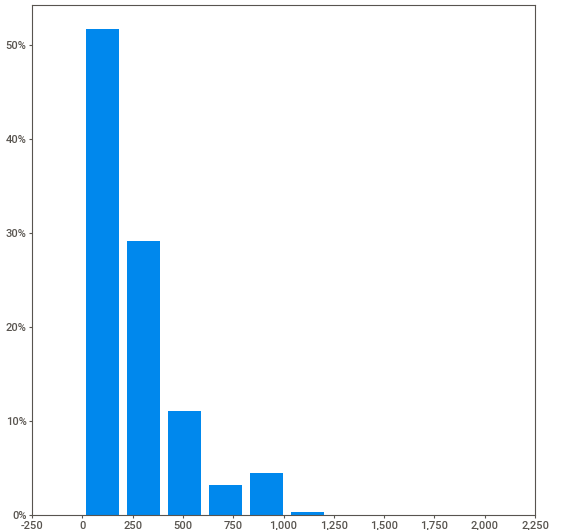
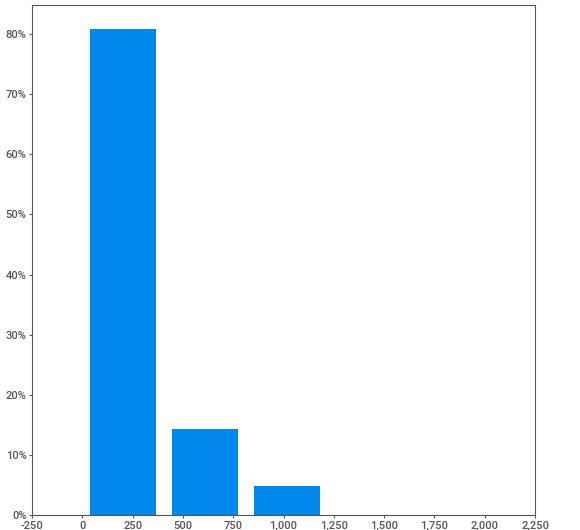
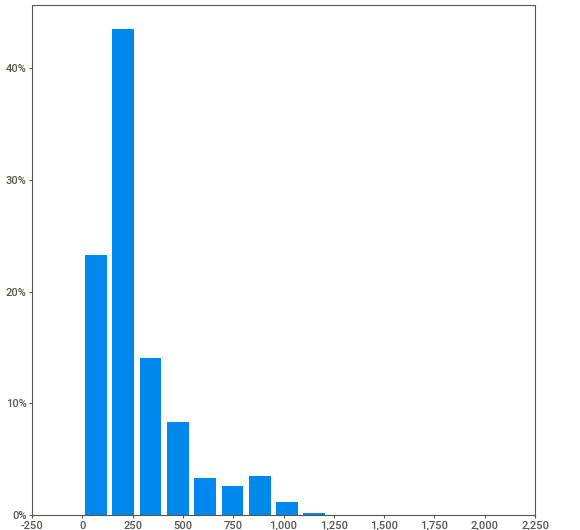
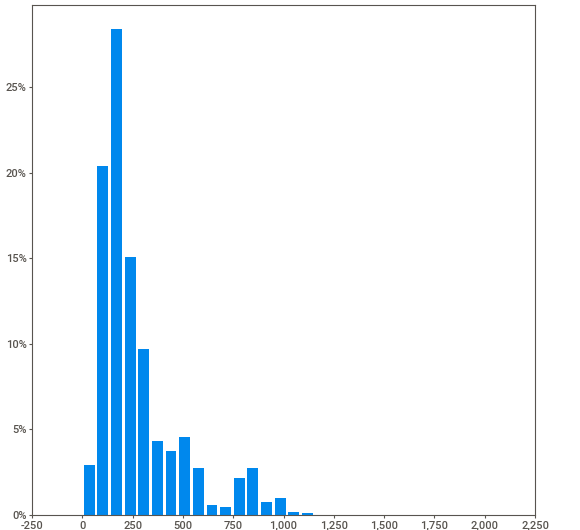
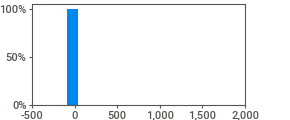
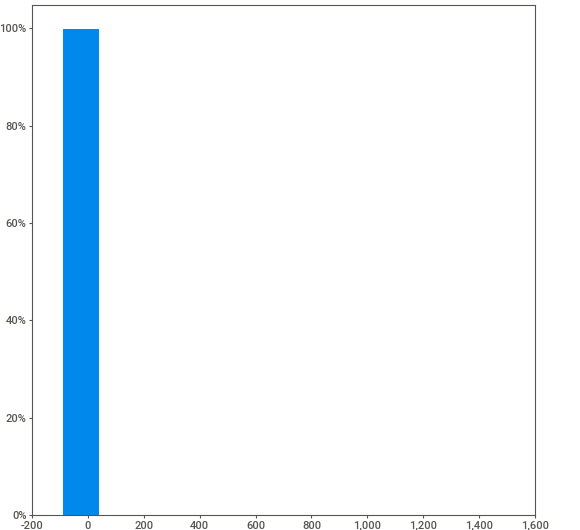
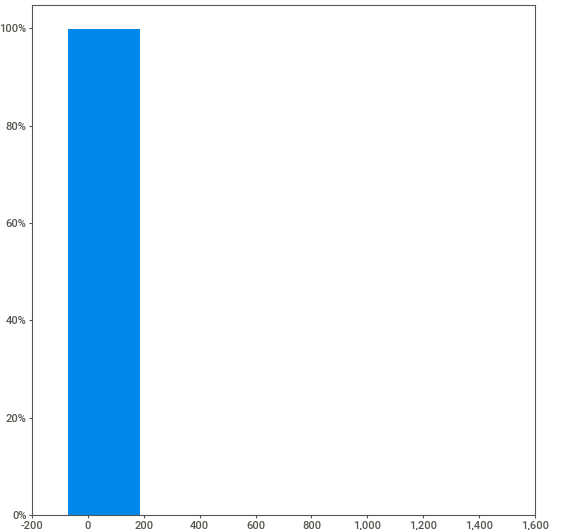
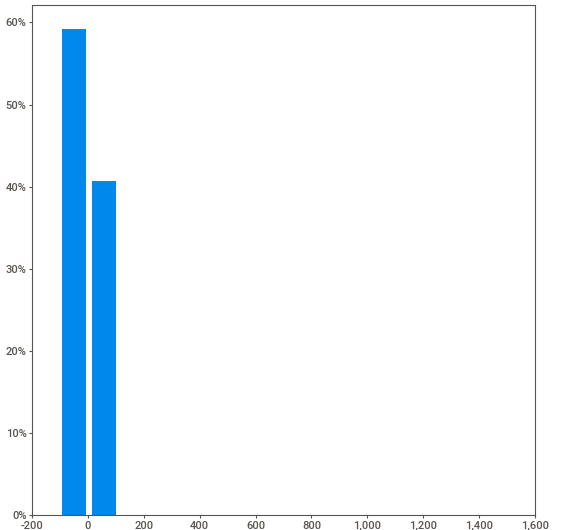
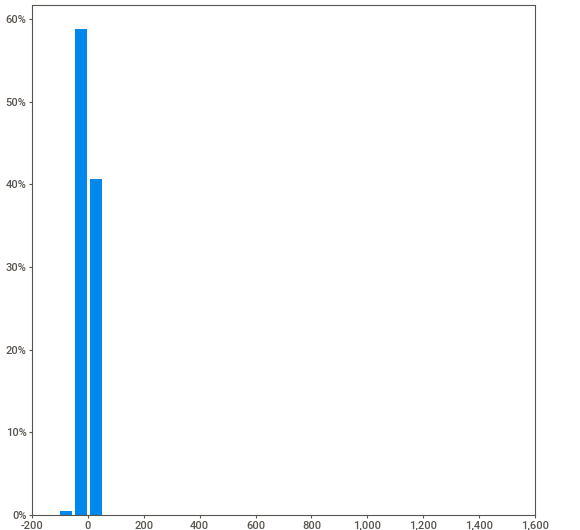
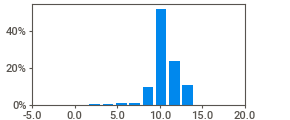
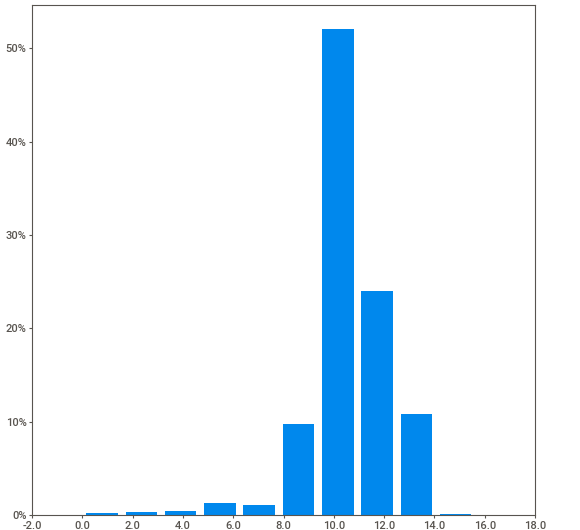
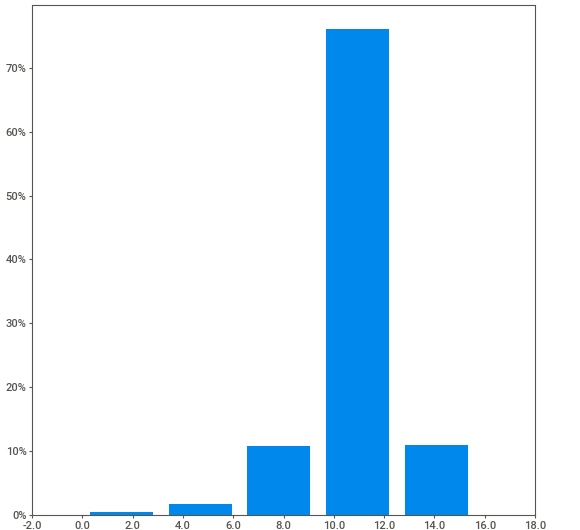
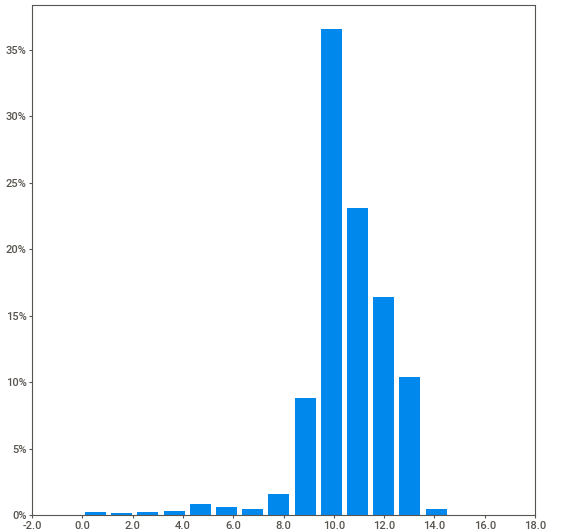
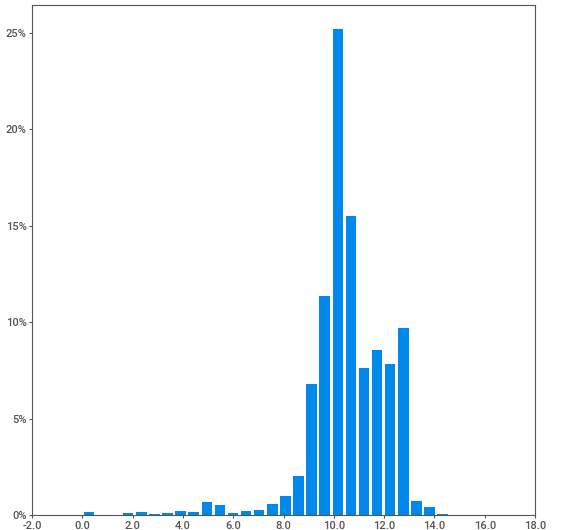
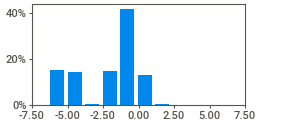
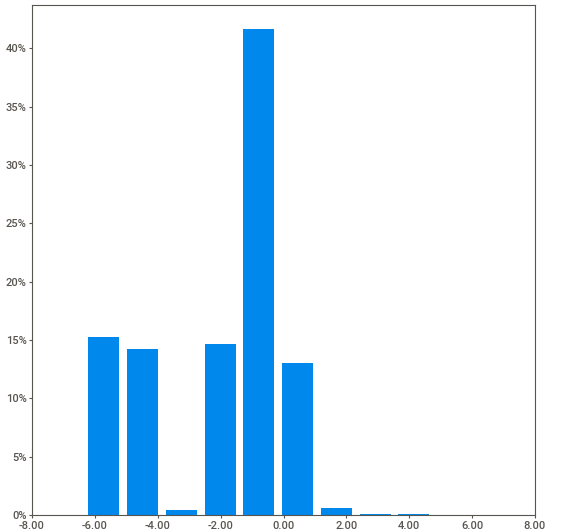
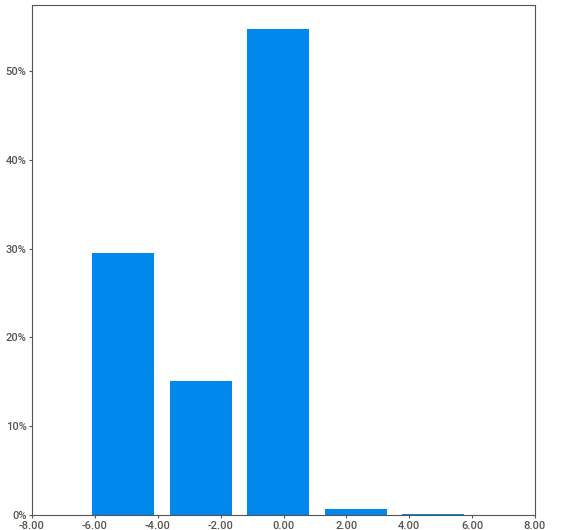
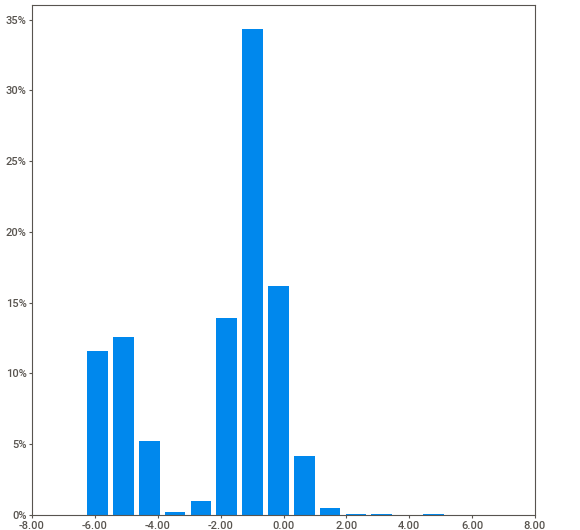
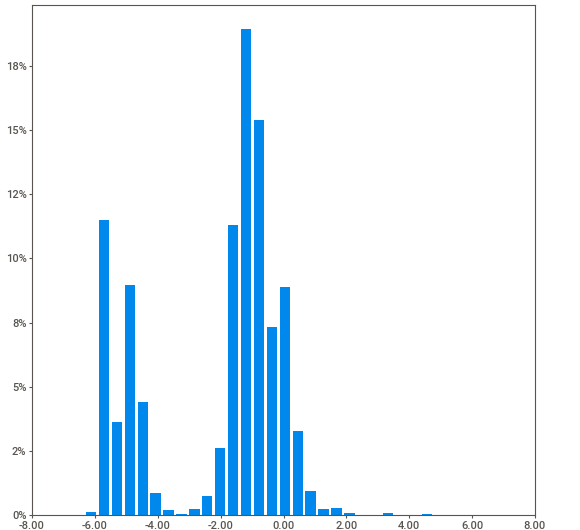
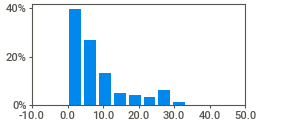
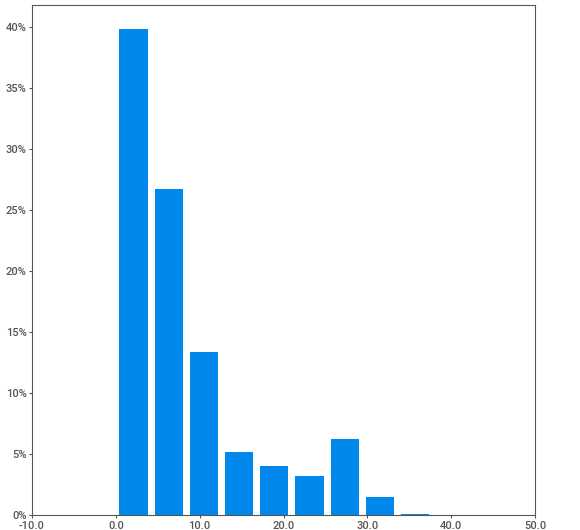
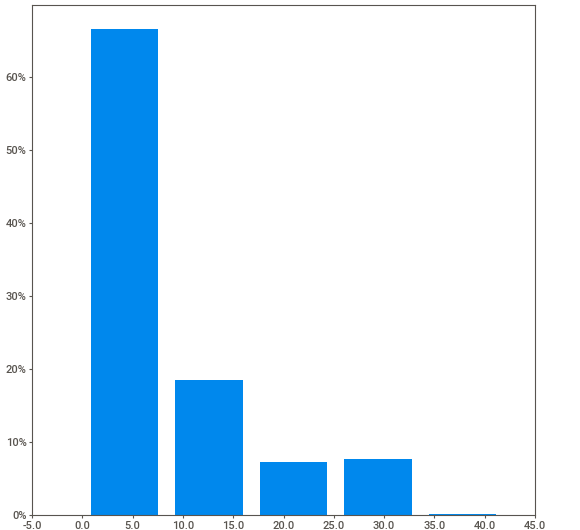
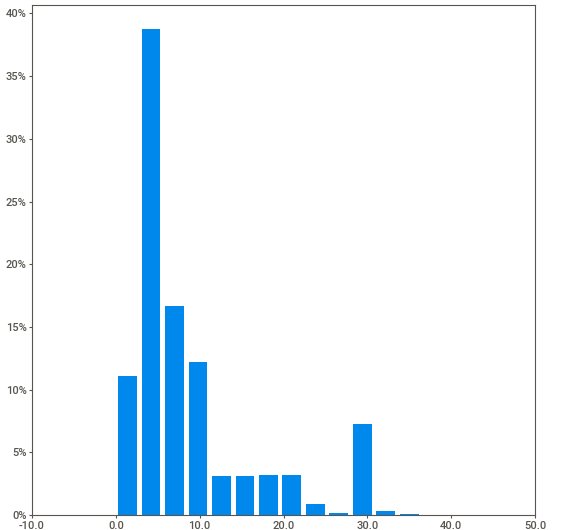
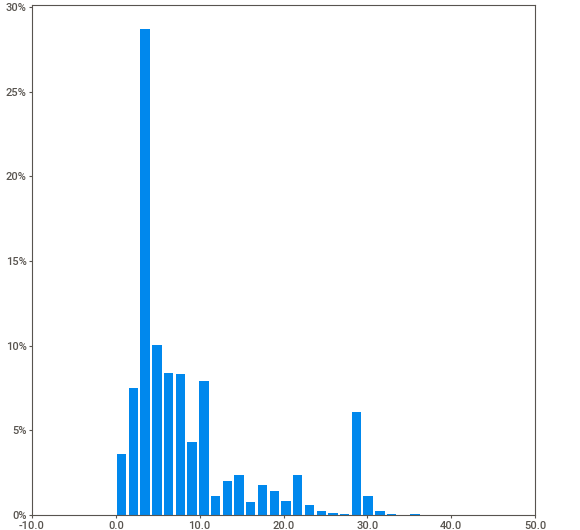
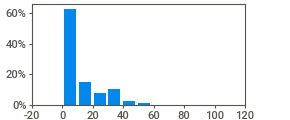
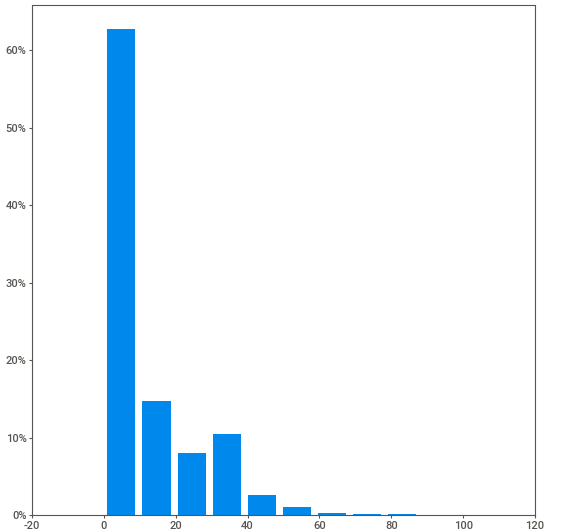
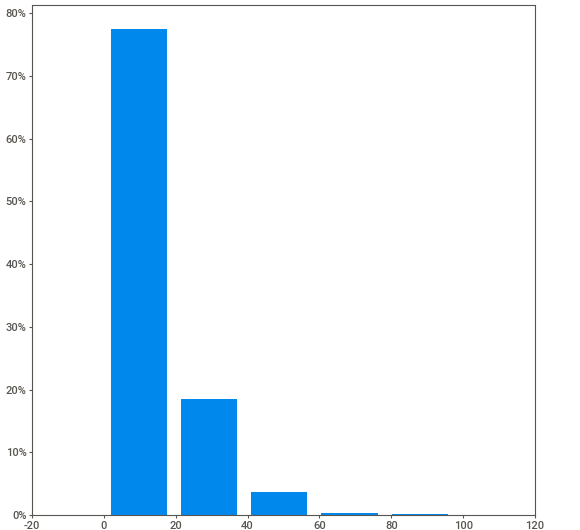
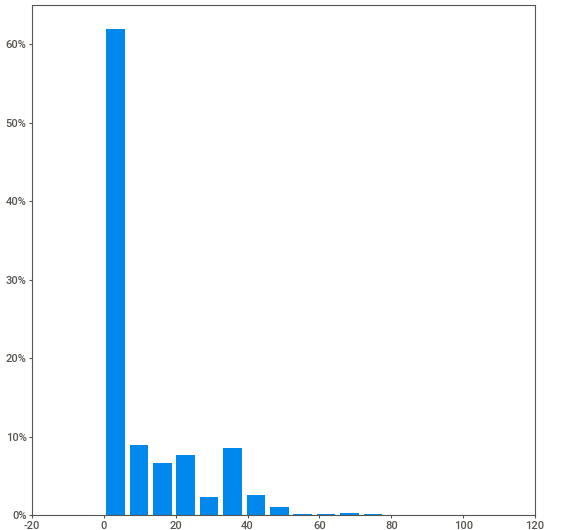
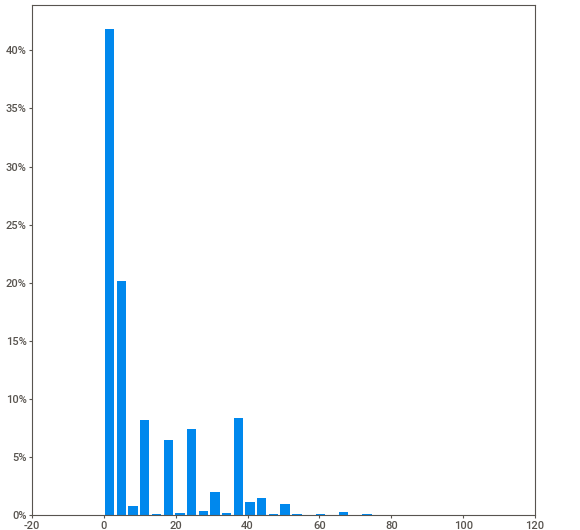
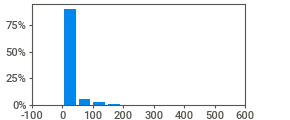
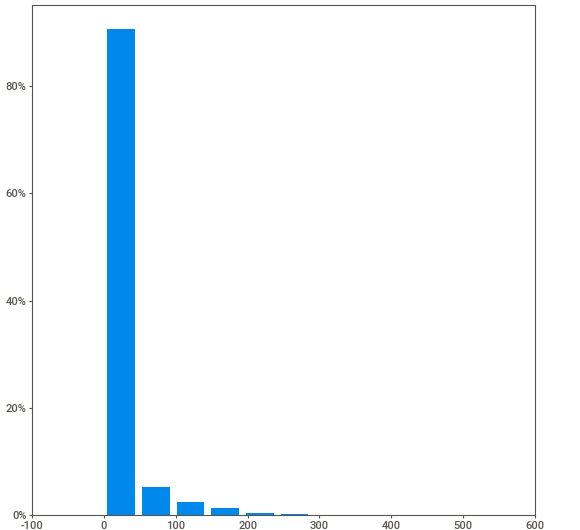
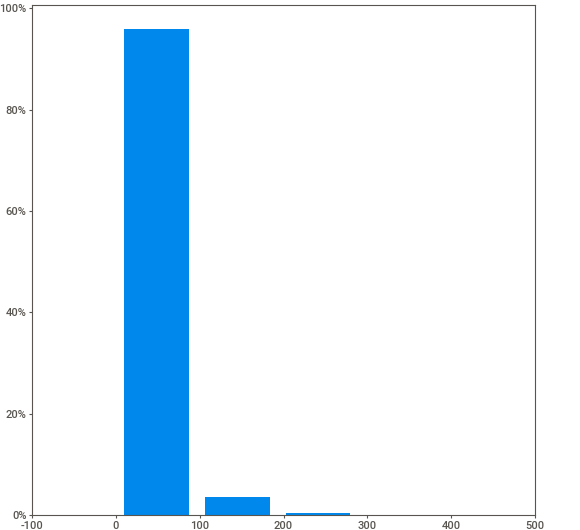
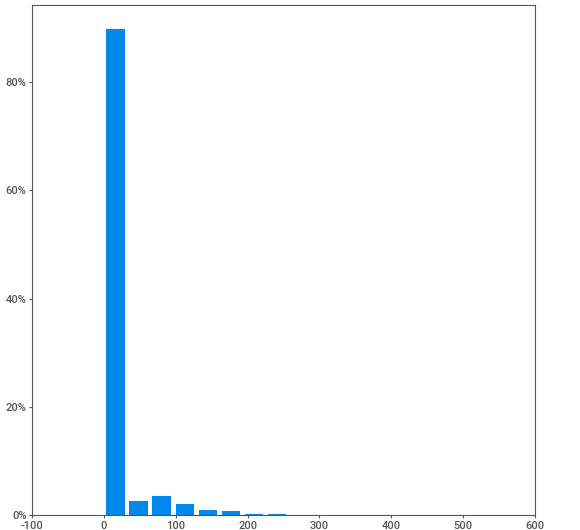
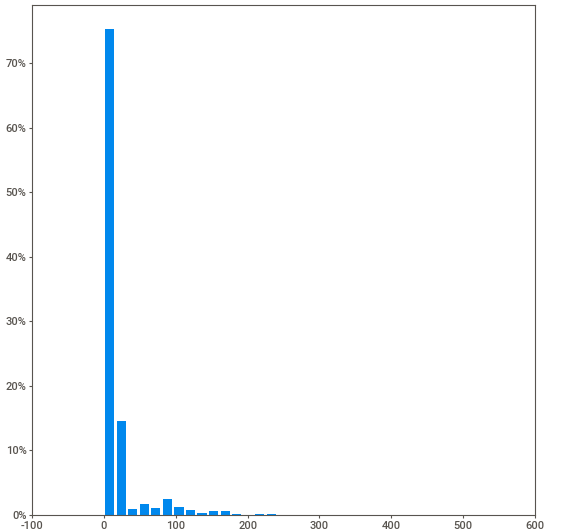
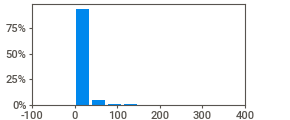
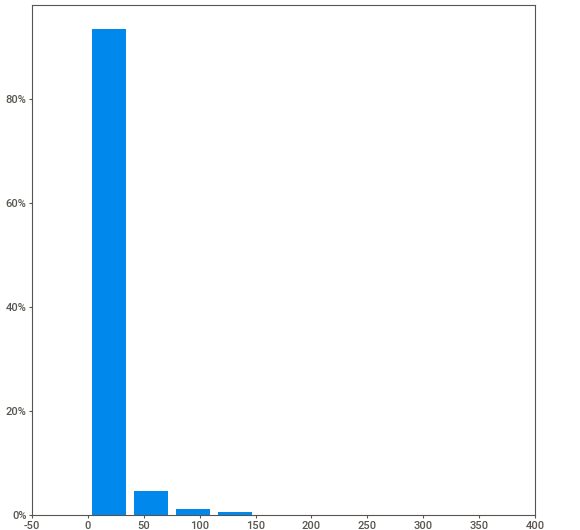
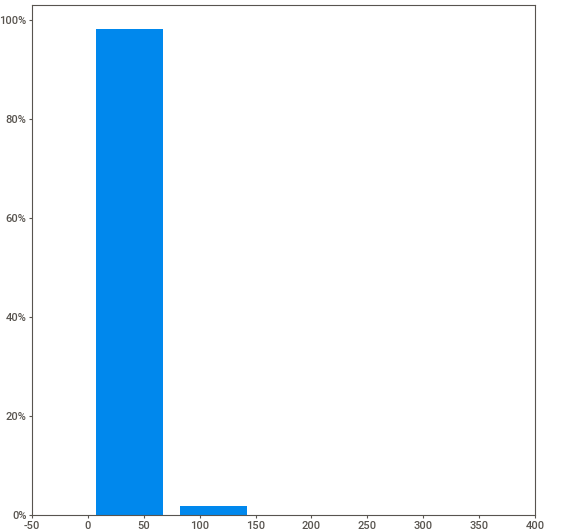
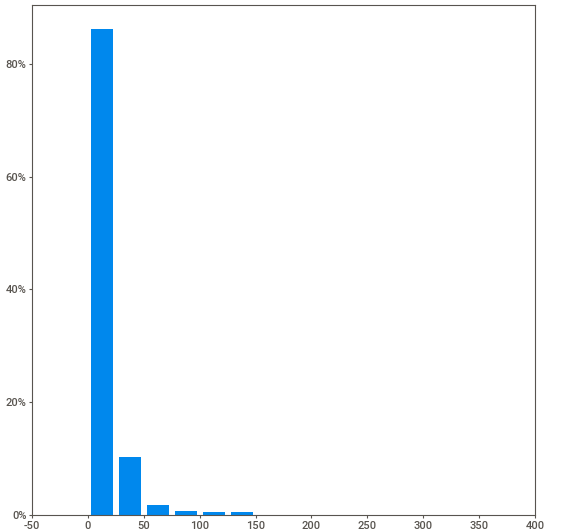
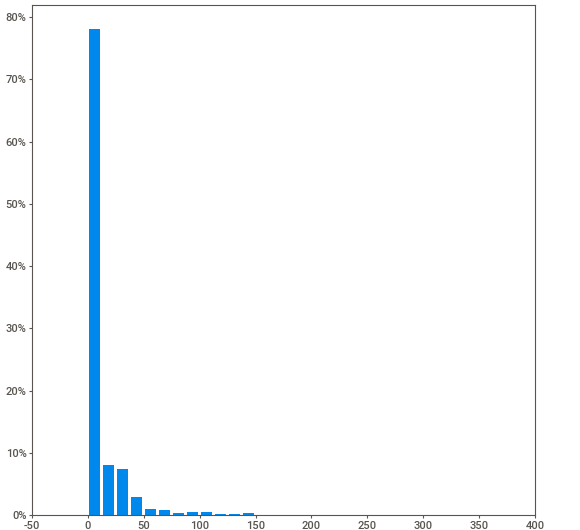
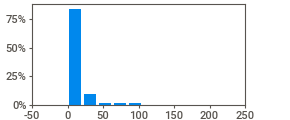
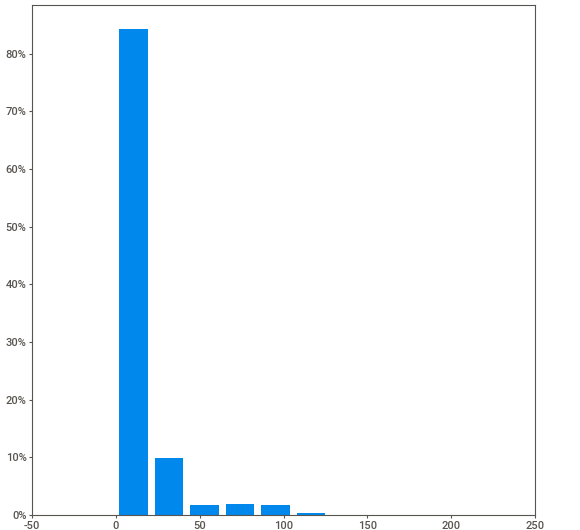
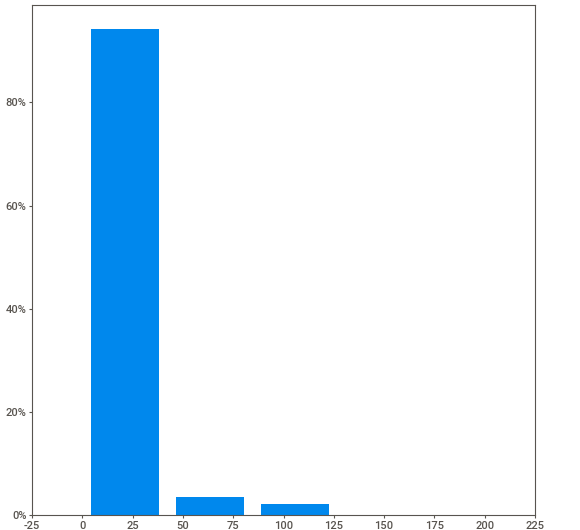
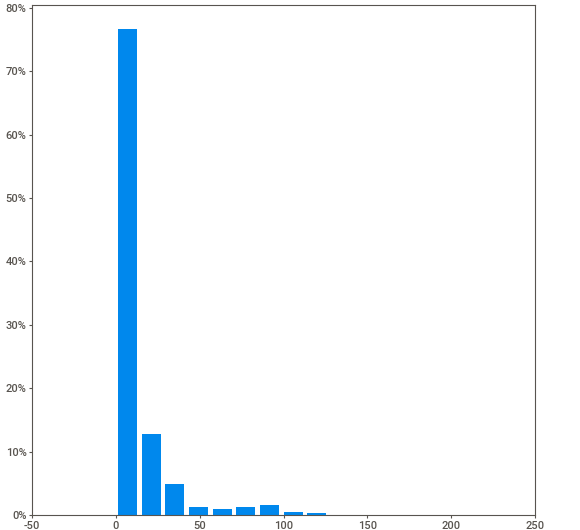
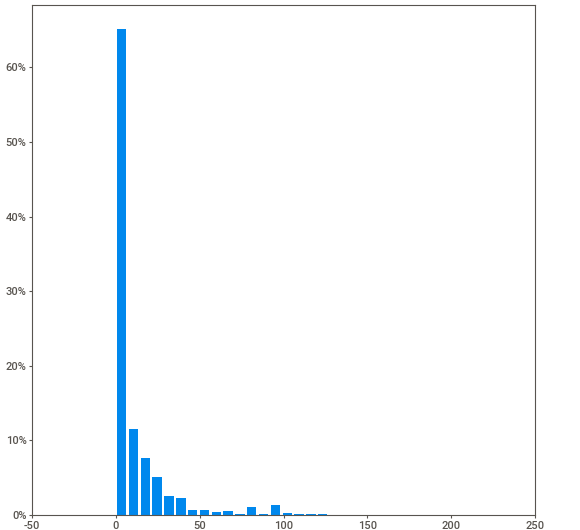
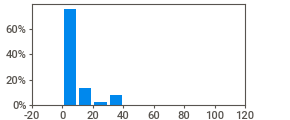
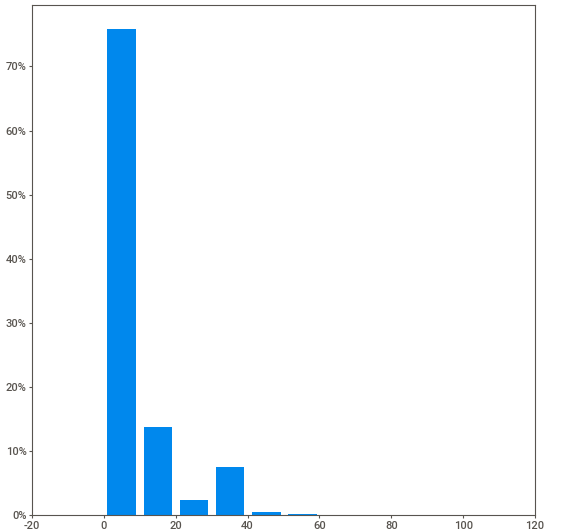
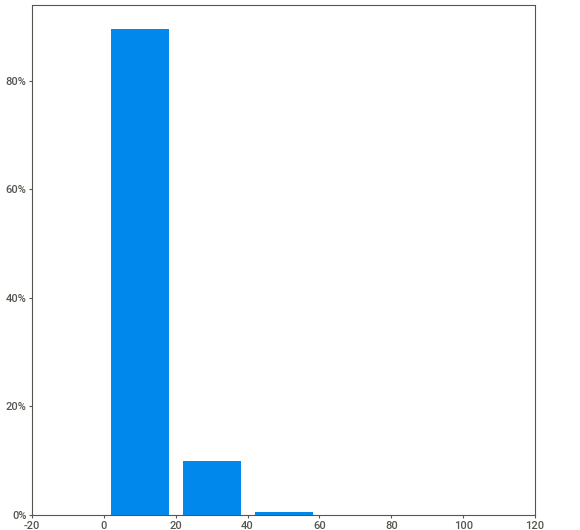
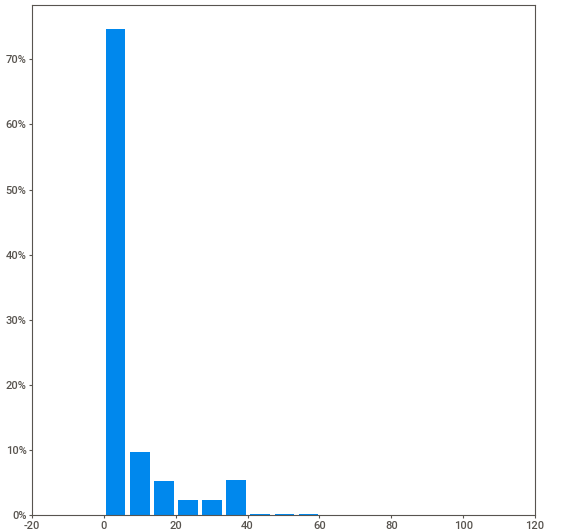
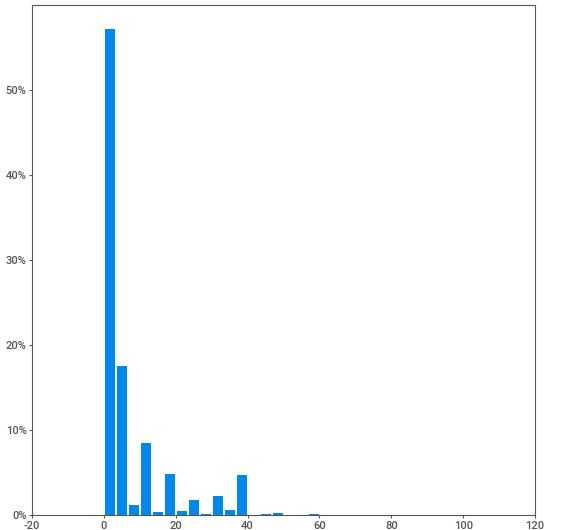
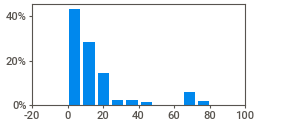
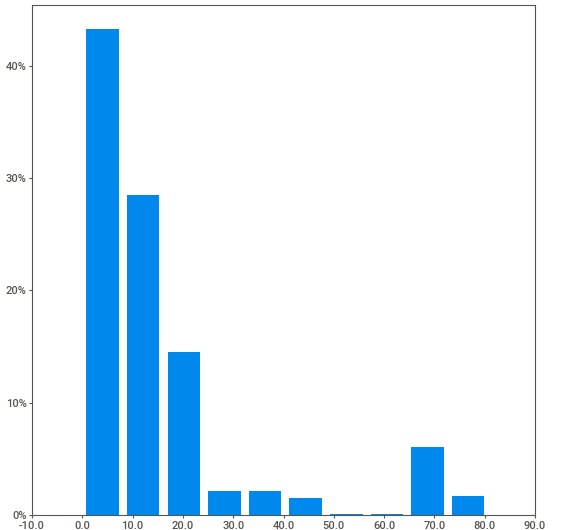
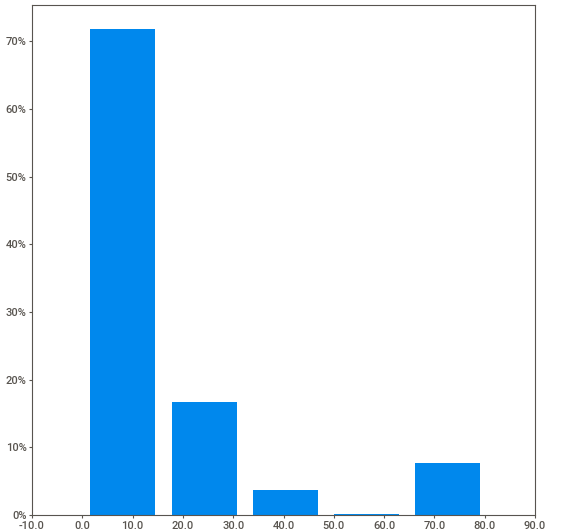
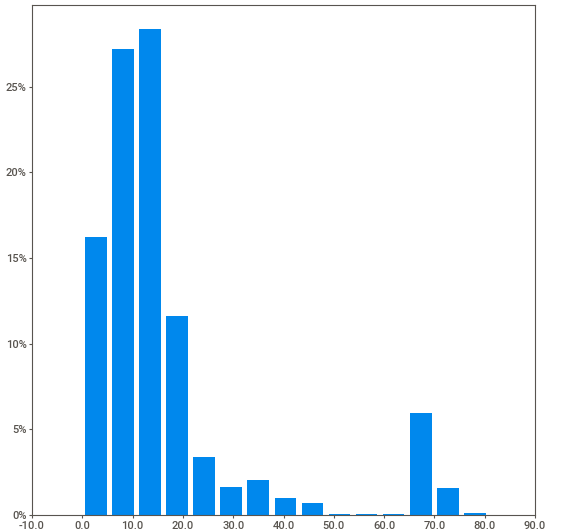
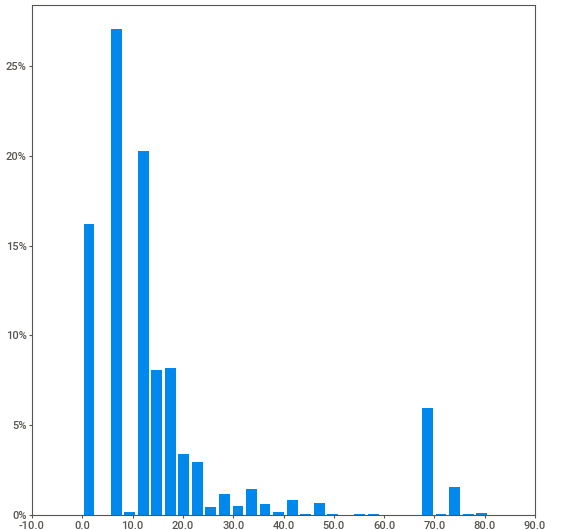
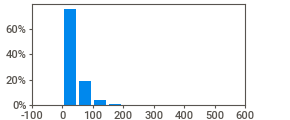
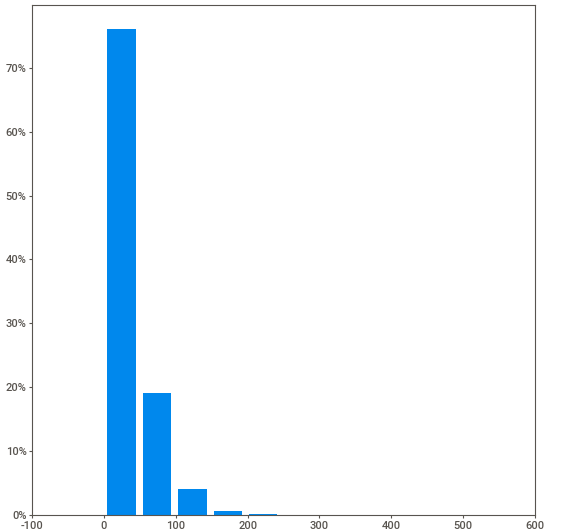
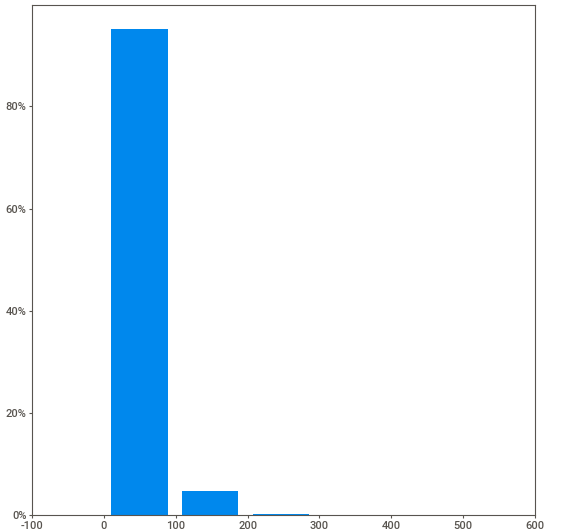
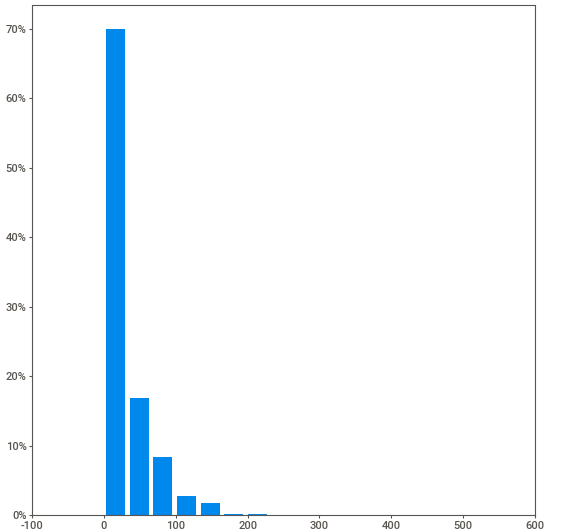
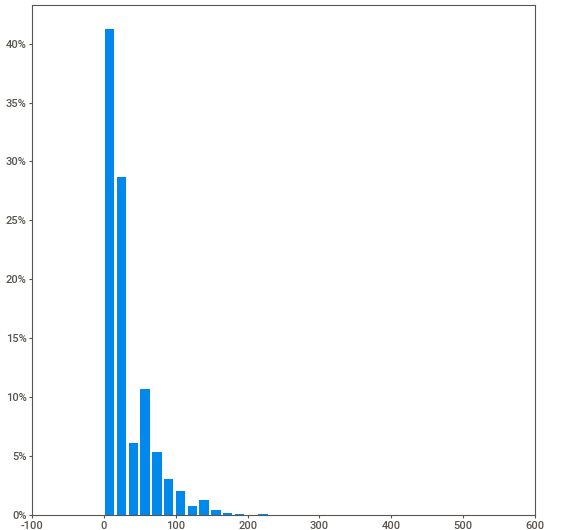
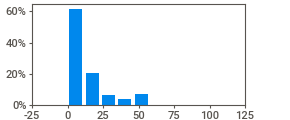
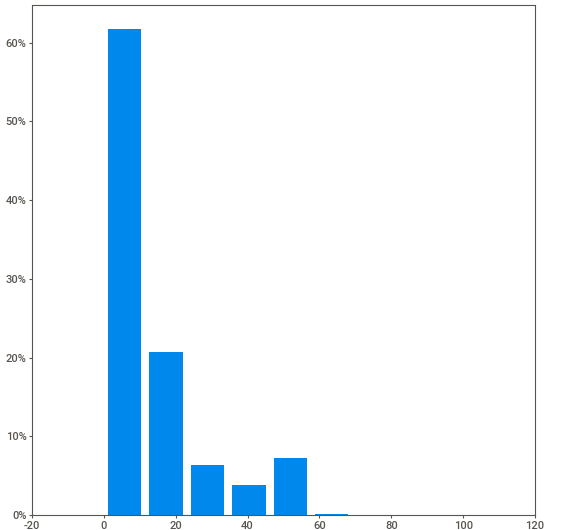
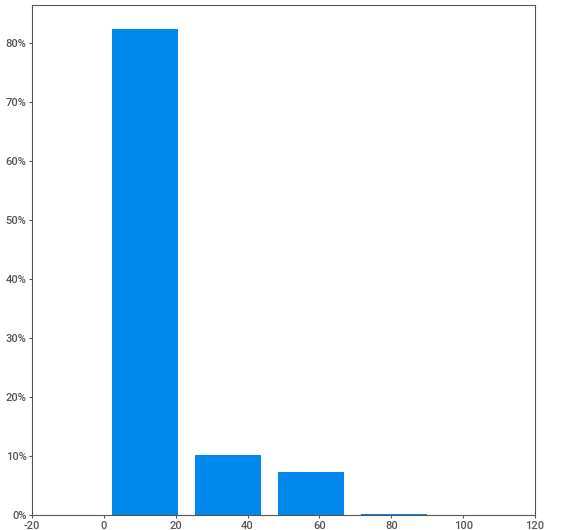
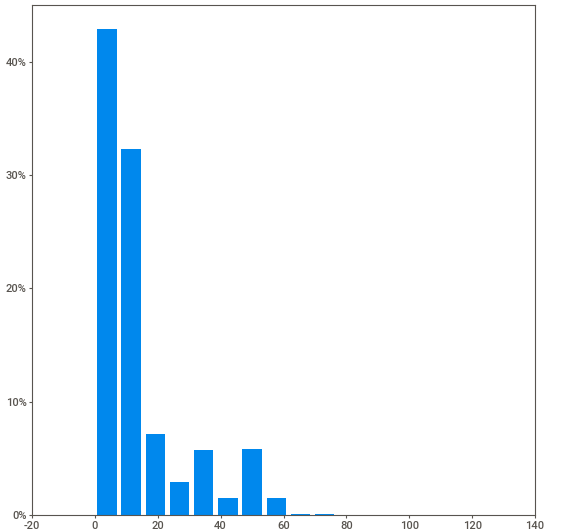
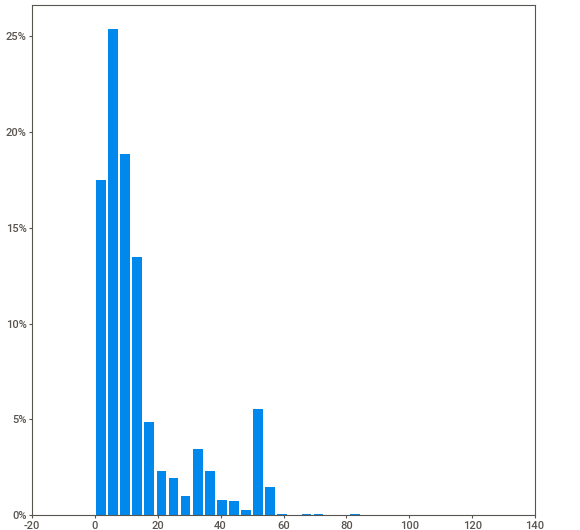
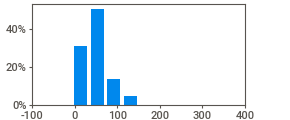
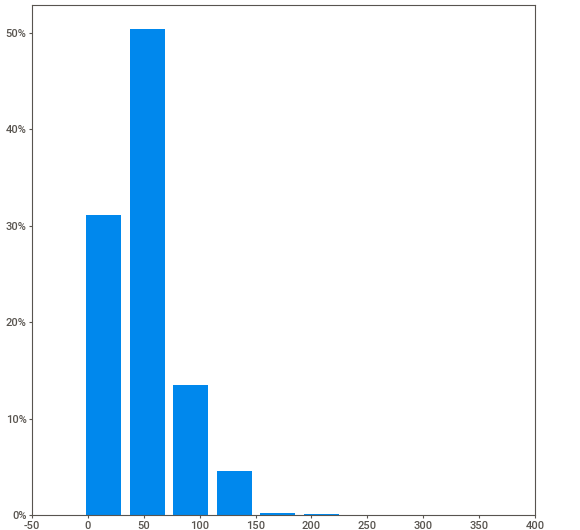
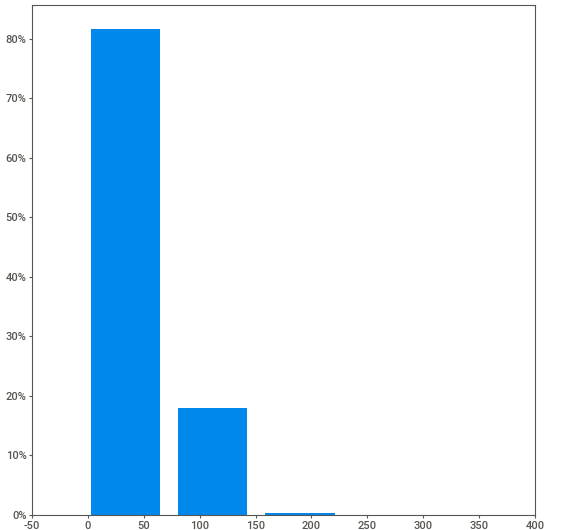
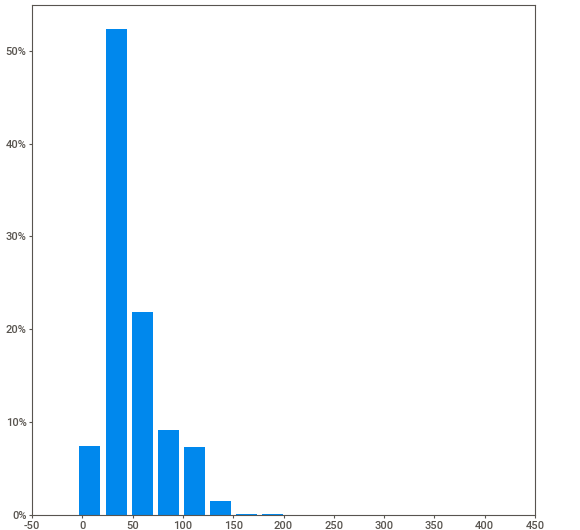
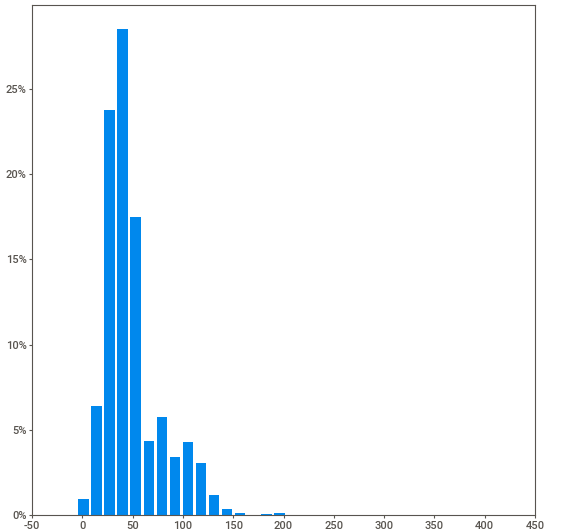
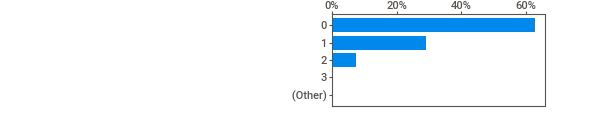
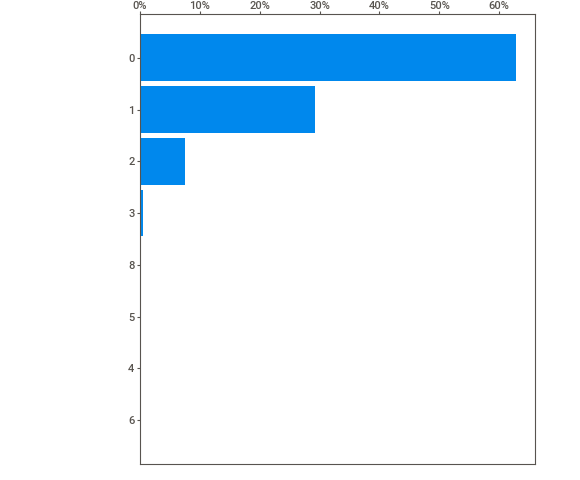
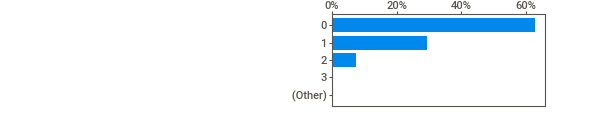
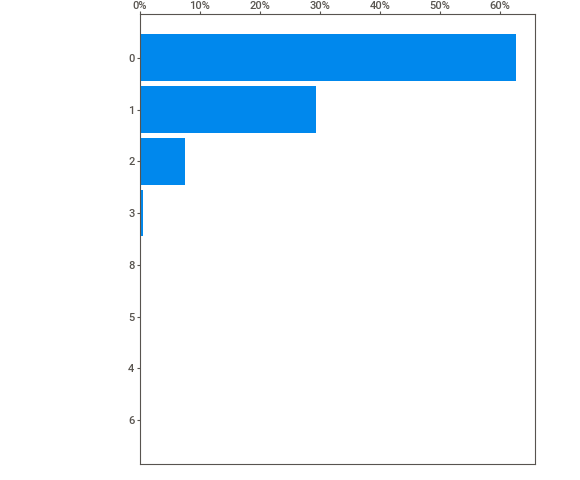
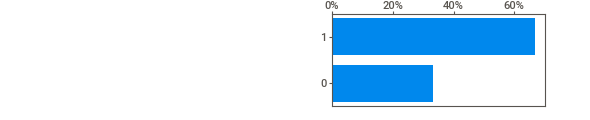
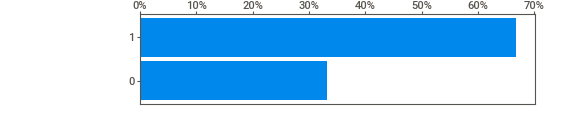
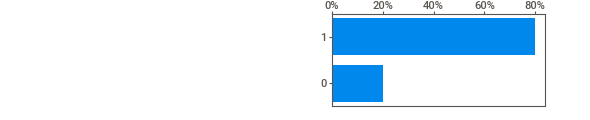
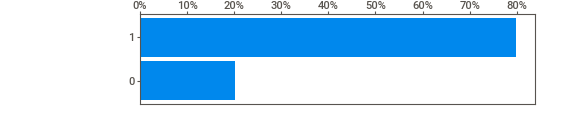
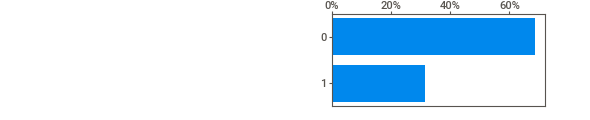
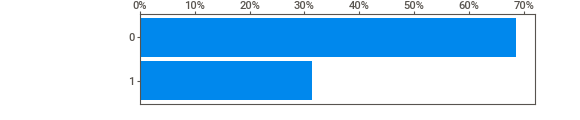
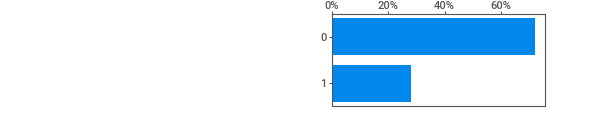
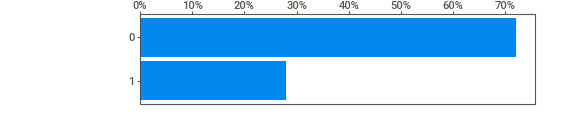
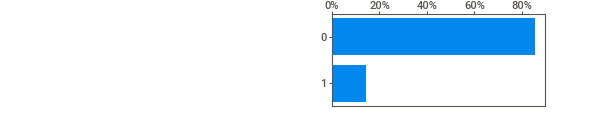
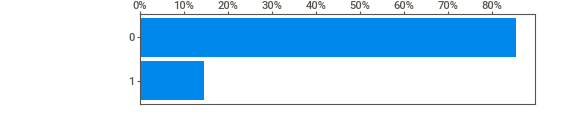
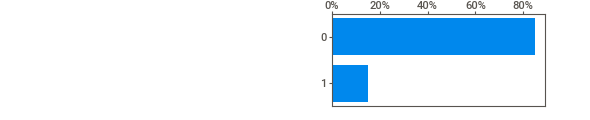
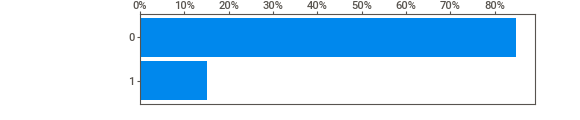
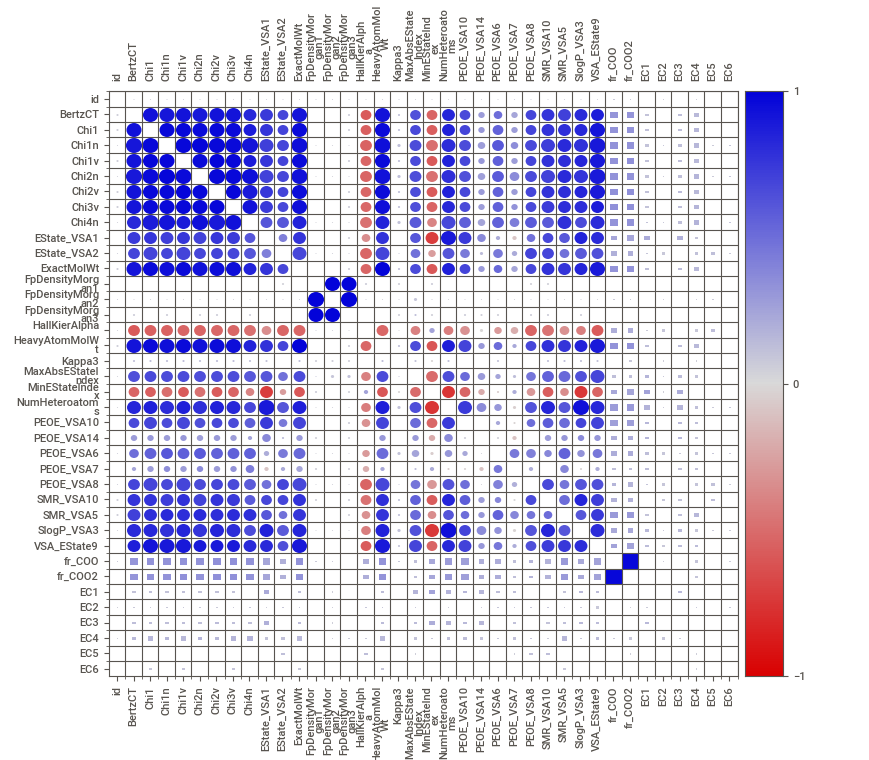
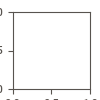

In [7]:
my_report.show_notebook(w="98%", h="full") # if working in Kaggle

In [8]:
# corr = train.corr().style.background_gradient(cmap = "coolwarm").format(precision=2)
# corr

## Correlation

In [9]:
corr = train.corr()

# Mask upper triangular part
mask = pd.DataFrame(np.triu(np.ones(corr.shape), k=1).astype(bool), index=corr.index, columns=corr.columns)

# Apply the mask to the correlation matrix
masked_corr = corr.mask(mask)

# Print the masked correlation matrix
masked_corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HallKierAlpha,HeavyAtomMolWt,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
id,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
BertzCT,0.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Chi1,-0.00,0.93,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Chi1n,0.00,0.91,0.97,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Chi1v,-0.00,0.92,0.98,0.98,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Chi2n,0.00,0.90,0.96,0.98,0.96,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Chi2v,-0.00,0.92,0.97,0.97,0.99,0.97,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Chi3v,0.00,0.91,0.96,0.97,0.97,0.97,0.98,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Chi4n,0.00,0.82,0.88,0.91,0.88,0.93,0.89,0.93,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
EState_VSA1,-0.01,0.72,0.75,0.70,0.75,0.68,0.74,0.72,0.59,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


# Data Skewness Reducing Techniques.

* Firstly looking at the skewness and kurtosis of a distribution from [Normal Distribution, Skewness, and Kurtosis](https://www.kaggle.com/discussions/getting-started/110134)
* Learning about the approaches to the problems [Data Skewness Reducing Techniques.](https://www.kaggle.com/discussions/getting-started/110134) 

## Kurtosis 

Kurtosis is a statistical measure that describes the shape of a probability distribution. It quantifies the heaviness of the tails and the peakedness or flatness of a distribution compared to the normal distribution. There are three main types of kurtosis: mesokurtic, leptokurtic, and platykurtic.


1. __Mesokurtic__: Similar to the normal distribution, with a moderate amount of outliers and tails that are neither too heavy nor too light.  The kurtosis value for a mesokurtic distribution is typically around 0. However, it's important to note that due to rounding and calculation methods, a distribution can still be considered mesokurtic even if the reported kurtosis value is slightly different from 0.

2. __Leptokurtic__: Has heavier tails and a more peaked central region compared to the normal distribution, indicating more extreme values or outliers. Generally, values above 3 indicate moderate leptokurtosis, and values above 6 indicate significant leptokurtosis.

3. __Platykurtic__: Has lighter tails and a flatter peak compared to the normal distribution, indicating fewer extreme values or outliers and a wider spread of data. Generally, values below -3 indicate moderate platykurtosis, and values below -6 indicate significant platykurtosis.

In [10]:
def skewness_analyser(df):
    
    return pd.DataFrame(
        data = {
            "skewness":df.skew(), 
            "kurtosis": df.kurt(),
        }
    ).style.background_gradient(cmap = "pink_r" ,)

In [11]:
# sk = skewness_analyser(train)
# sk

## Outliers 

Finding out the outliers present in dataset by IQR(Inter Quartile Range)Method: 

In [12]:
def out_iqr(df):
#     global lower,upper
    columns = df.columns 
    iqrs,lower_out , upper_out = [],[],[]
    for column in columns:
        q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
        # calculate the IQR
        iqr = q75 - q25
        # calculate the outlier cutoff
        cut_off = iqr * 1.5
        # calculate the lower and upper bound value
        lower, upper = q25 - cut_off, q75 + cut_off
#         print('The IQR is',iqr)
#         print('The lower bound value is', lower)
#         print('The upper bound value is', upper)
        # Calculate the number of records below and above lower and above bound value respectively
        df1 = df[df[column] > upper].shape[0]
        df2 = df[df[column] < lower].shape[0]
        iqrs.append(iqr)
        upper_out.append(df1)
        lower_out.append(df2)
    return pd.DataFrame(
        data = {
            "columns": df.columns,
            "iqr":iqrs,
            "lower_outliers":lower_out,
            "upper_outliers": upper_out,
        }
    ).style.background_gradient(axis=0, cmap="Greens")

In [13]:
old_outliers = out_iqr(train)
old_outliers

,columns,iqr,lower_outliers,upper_outliers
0,id,7418.500000,0,0
1,BertzCT,503.548984,0,1301
2,Chi1,6.489738,0,1175
3,Chi1n,4.642235,0,1178
4,Chi1v,5.595017,0,1158
5,Chi2n,3.839075,0,1190
6,Chi2v,4.574882,0,1194
7,Chi3v,3.341307,0,1180
8,Chi4n,2.030385,0,697
9,EState_VSA1,38.907254,0,198


In [14]:
X_cols = [
 'BertzCT',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3v',
 'Chi4n',
 'EState_VSA1',
 'EState_VSA2',
 'ExactMolWt',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'HallKierAlpha',
 'HeavyAtomMolWt',
 'Kappa3',
 'MaxAbsEStateIndex',
 'MinEStateIndex',
 'NumHeteroatoms',
 'PEOE_VSA10',
 'PEOE_VSA14',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'SMR_VSA10',
 'SMR_VSA5',
 'SlogP_VSA3',
 'VSA_EState9',
 'fr_COO',
 'fr_COO2',
]
y_cols = ['EC1','EC2',]

In [15]:
X_train = train.loc[:,X_cols]
y_train = train.loc[:,y_cols]

X_test = test.loc[:,X_cols]

In [16]:
X_train.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,...,91.536492,0.000000,0.000000,0.000000,17.744066,0.000000,4.794537,35.527357,0,0
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,...,7.822697,0.000000,0.000000,0.000000,7.822697,30.705892,13.825658,44.707310,0,0
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,...,15.645394,0.000000,53.378235,0.000000,15.645394,73.143616,17.964475,45.660120,0,0
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,...,21.335138,0.000000,0.000000,6.420822,15.645394,62.107304,31.961948,87.509997,0,0
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,...,11.938611,6.923737,19.386400,0.000000,11.938611,18.883484,9.589074,33.333333,2,2


In [17]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()

# X_train.iloc[:,:] = sc.fit_transform(X_train.iloc[:,:])
# X_test.iloc[:,:] = sc.transform(X_test.iloc[:,:])

In [18]:
# X_train.plot(subplots = True, kind = "hist", layout = (6,6) ,figsize = (15,15))

Lets see the skewness and kurtosis of each column on `X_train`

In [19]:
skewness_analyser(X_train)

,skewness,kurtosis
BertzCT,1.775677,2.939466
Chi1,1.679368,2.906784
Chi1n,1.722855,3.467028
Chi1v,1.782578,3.112454
Chi2n,1.667144,3.033378
Chi2v,1.748260,2.819865
Chi3v,1.644531,2.534616
Chi4n,1.893930,5.154985
EState_VSA1,1.426010,2.938943
EState_VSA2,1.914321,4.026768


The columns `'FpDensityMorgan1','FpDensityMorgan2','FpDensityMorgan3',` are extremely skewed and the value of kurtosis is __extermely high__. Also `PEOE_VSA....` also have very high kurtosis value. 

## Treatment of skewed values: 

I will be using `power_transform` from `sklearn.preprocessing`. 

I have not used boxcox approach as it cannot transfrom zero and negative values. (Since boxcox uses log transformation which cant be used for negative values and zeros...)

Thus I chose `"yeo-johnson"` which works fine for zeros and negatives.

Text(0.5, 1.0, 'Histgram')

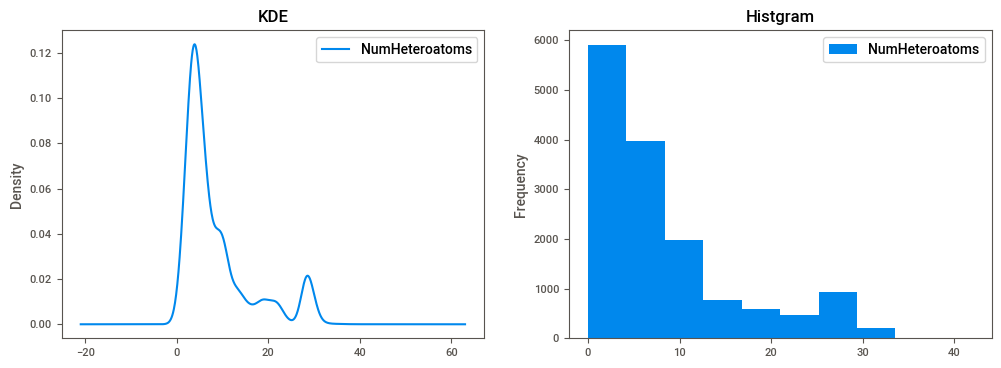

In [20]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
ax = X_train["NumHeteroatoms"].plot(kind = "kde", legend=True)
plt.title(f"KDE" )

plt.subplot(1,2,2)
X_train["NumHeteroatoms"].plot(kind = "hist" ,)
plt.legend()
plt.title("Histgram")

In [21]:
from sklearn.preprocessing import power_transform
X_train.iloc[:,:] = power_transform(X_train.iloc[:,:] , method = "yeo-johnson")

Text(0.5, 1.0, 'Histgram after treatment')

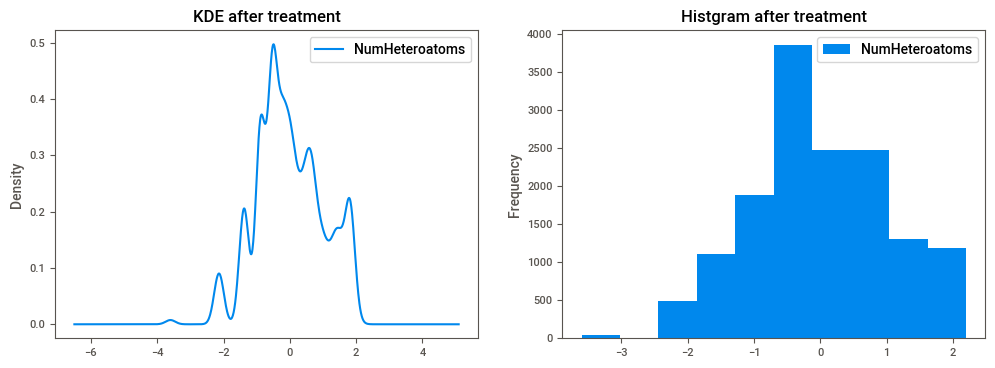

In [22]:

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
ax = X_train["NumHeteroatoms"].plot(kind = "kde", legend=True)
plt.title(f"KDE after treatment" )

plt.subplot(1,2,2)
X_train["NumHeteroatoms"].plot(kind = "hist" ,)
plt.legend()
plt.title("Histgram after treatment")

After the transformation

In [23]:
skewness_analyser(X_train)

,skewness,kurtosis
BertzCT,0.016576,0.061544
Chi1,-0.004473,0.268709
Chi1n,-0.001313,0.118058
Chi1v,0.001759,0.044686
Chi2n,0.005624,-0.161893
Chi2v,0.012638,-0.239172
Chi3v,0.039500,-0.631158
Chi4n,0.070415,-0.882041
EState_VSA1,-0.126915,-0.995065
EState_VSA2,-0.016777,-1.436896


It went from `Kappa3	26.419611	764.704780` to `Kappa3	5.908518	253.173257` skewness and kurtosis respectively. Improvement !!

Text(0.5, 1.0, 'Histgram after treatment')

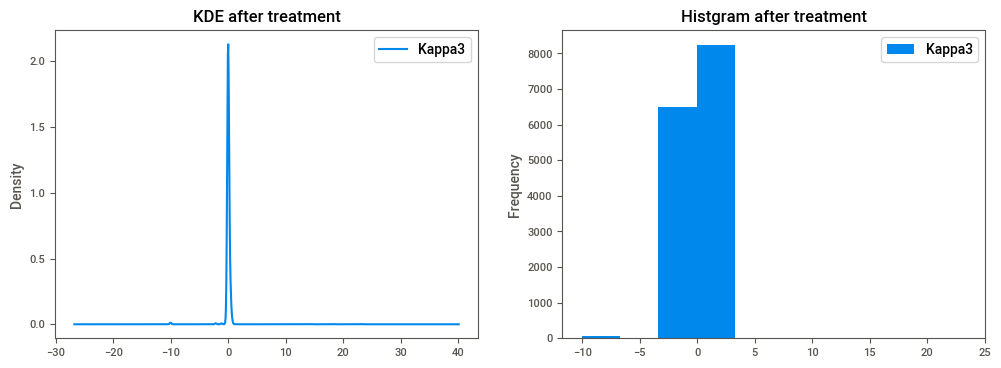

In [24]:
# Lets see of Kappa3
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
ax = X_train["Kappa3"].plot(kind = "kde", legend=True)
plt.title(f"KDE after treatment" )

plt.subplot(1,2,2)
X_train["Kappa3"].plot(kind = "hist" ,)
plt.legend()
plt.title("Histgram after treatment")



Lets see the outliers after transformation !

In [25]:
new_outliers = out_iqr(X_train)
new_outliers

,columns,iqr,lower_outliers,upper_outliers
0,BertzCT,1.322793,206,11
1,Chi1,1.286616,169,4
2,Chi1n,1.312928,165,5
3,Chi1v,1.353152,156,1
4,Chi2n,1.346688,0,1
5,Chi2v,1.353562,0,0
6,Chi3v,1.390967,0,0
7,Chi4n,1.528769,0,0
8,EState_VSA1,1.390516,0,2
9,EState_VSA2,1.875082,0,0


In [26]:
X_test.iloc[:,:] = power_transform(X_test.iloc[:,:], method = "yeo-johnson")
X_test.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2
0,0.018000,0.015083,-0.023801,0.211707,0.030598,0.279085,-0.067300,-0.032996,0.890715,-1.172379,...,0.495247,-0.691346,-0.972555,-0.867932,0.917949,0.182047,-0.433791,0.100722,1.226463,1.222191
1,1.515171,0.582676,0.610336,0.626720,0.593390,0.432207,0.603229,0.839450,-1.527390,1.296112,...,-1.369371,1.552273,1.730788,1.042541,-1.716411,0.912286,-1.636843,-0.056658,-0.761152,-0.763068
2,-1.112822,-0.898555,-1.198852,-1.244280,-1.261545,-1.295525,-1.339539,-1.285963,-0.590465,0.244916,...,-0.007332,-0.691346,-0.972555,0.857449,0.135454,-0.284825,0.087259,-0.909412,1.226463,1.222191
3,-0.681422,-0.296137,-0.335155,-0.420212,-0.306419,-0.395391,-0.316298,-0.467498,-1.527390,-1.172379,...,1.459802,-0.691346,-0.972555,-0.867932,0.506818,0.421662,-0.433791,-0.795282,-0.761152,-0.763068
4,1.807888,1.805391,1.708304,1.760261,1.713035,1.816497,1.760099,1.412300,1.409624,1.637983,...,0.849230,1.510282,-0.972555,1.522337,2.018987,0.590534,1.801201,1.668391,-0.761152,-0.763068


In [27]:
y_train.head()

,EC1,EC2
0,1,1
1,0,1
2,1,1
3,1,1
4,1,0


# Model 

I will be training models seperately on each feature `EC1` and `EC2`. 

Lets search for optimal parameters for the both of the models 

In [44]:
import optuna
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

def objective1(trial):
    ec1 = CatBoostClassifier(
        iterations=trial.suggest_int("iterations", 100, 1000),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        random_seed = trial.suggest_int("random_seed" , 1,42),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        verbose=False, 
        task_type = "CPU",
    ).fit(X_train, y_train["EC1"])
    
    y_pred1 = ec1.predict_proba(X_train)[:,-1]
    return roc_auc_score(y_train["EC1"], y_pred1)


def objective2(trial):
    ec2 = CatBoostClassifier(
        iterations=trial.suggest_int("iterations", 100, 1000),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        random_seed = trial.suggest_int("random_seed" , 1,42),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        verbose=False, 
        task_type = "CPU",
    ).fit(X_train, y_train["EC2"])
    
    y_pred2 = ec2.predict_proba(X_train)[:,-1]
    return roc_auc_score(y_train["EC2"], y_pred2)

In [ ]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
from optuna.samplers import TPESampler
storage = optuna.storages.RDBStorage(url='sqlite:///example.db')

sampler = TPESampler(seed=1)
study1 = optuna.create_study(storage = storage,study_name="catboost", direction="maximize", sampler=sampler,load_if_exists = True)
study2 = optuna.create_study(storage = storage,study_name="catboost", direction="maximize", sampler=sampler, load_if_exists = True)

study1.optimize(objective1, n_trials=50,show_progress_bar=True,n_jobs = 4)
study2.optimize(objective2, n_trials=50,show_progress_bar=True,n_jobs = 4)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
print("Best trial:")
ec1_trial = study1.best_trial
ec2_trial = study2.best_trial

print("  EC1 --> Value: ", ec1_trail.value)
print("  Params: ")
for key, value in ec1_trial.params.items():
    print("    {}: {}".format(key, value))
    
print("  EC2 --> Value: ", ec2_trail.value)
print("  Params: ")
for key, value in ec2_trial.params.items():
    print("    {}: {}".format(key, value))

In [34]:
# from catboost import CatBoostClassifier
# from sklearn.metrics import roc_auc_score

# ec1 = CatBoostClassifier(iterations=200,metric_period=100, task_type = "GPU").fit(X_train.values, y_train["EC1"])
# ec2 = CatBoostClassifier(iterations=200,metric_period=100, task_type = "GPU").fit(X_train.values, y_train["EC2"])

# pred1 = ec1.predict_proba(X_train)[:,-1]
# pred2 = ec2.predict_proba(X_train)[:,-1]

# roc_auc_score(y_train["EC1"], pred1)

Learning rate set to 0.122921
0:	learn: 0.6657503	total: 102ms	remaining: 20.4s
100:	learn: 0.5253396	total: 4.18s	remaining: 4.09s
199:	learn: 0.4826705	total: 8.86s	remaining: 0us
Learning rate set to 0.122921
0:	learn: 0.6433013	total: 60.4ms	remaining: 12s
100:	learn: 0.4527219	total: 5.05s	remaining: 4.95s
199:	learn: 0.4141086	total: 9.63s	remaining: 0us


0.8359052266654438

In [ ]:
from catboost import CatBoostClassifier

ec1 = CatBoostClassifier(**ec1_trial.params, ).fit(X_train.values, y_train["EC1"])
ec2 = CatBoostClassifier(**ec2_trial.params, ).fit(X_train.values, y_train["EC2"])

In [ ]:
pred1 = ec1.predict_proba(X_test)[:,-1]
pred2 = ec2.predict_proba(X_test)[:,-1]

In [ ]:
sumbission["EC1"] = pred1
sumbission["EC2"] = pred2

sumbission.to_csv("/kaggle/working/submission.csv" , index = False)

In [ ]:
sumbission.head()

[W 2023-06-27 13:14:05,836] Trial 0 failed with parameters: {'iterations': 605, 'learning_rate': 0.0104860036210731, 'depth': 9, 'l2_leaf_reg': 0.021705790377543284, 'bootstrap_type': 'Bayesian', 'random_strength': 4.6491034119548723e-07, 'bagging_temperature': 1.1617574936234576, 'od_type': 'IncToDec', 'od_wait': 25} because of the following error: ValueError('Found input variables with inconsistent numbers of samples: [14838, 9893]').
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_28/3203465074.py", line 20, in objective1
    return accuracy_score(y_train["EC1"], y_pred1)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_